# Assignment 3. Sentiment analysis using word and document embeddings.

Full instructions on completion of this assignment can be found in Canvas.

## 1. Theoretical part

### 1.1 Word embeddings

Write down objective functions of the Skip-Gram word embedding models assuming negative sampling (SGNS).

Let K negative samples (words)
$$
J_{neg-sample} = -\log \sigma( u_i * v_o) - \sum_{k=1}^K \log \sigma( -u_i * v_k)
$$

Write down derivatives with respect to the parameters (weights) of this loss function.

$$
\frac{\partial J}{\partial u_i} = -\frac{(\sigma( u_i * v_o))^{'}}{\sigma( u_i * v_o)}-\sum_{k=1}^K \frac{(\sigma( -u_i * v_k))^{'}}{\sigma( -u_i * v_k)} =(\sigma( u_i * v_o) -1)v_o - \sum_{k=1}^K (\sigma( -u_i * v_k) - 1) v_k  
$$

$$
\frac{\partial J}{\partial v_o} = (\sigma( u_i * v_o) -1)u_i
$$

$$
\frac{\partial J}{\partial v_k} = - (\sigma( -u_i * v_k) - 1)u_i, \qquad \text{ for all } k =1,\dots, K
$$

## 2. Practical part

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%matplotlib inline
%cd /content/gdrive/My Drive/Colab Notebooks
# %mkdir DL_project
# %mkdir dataset

%cd /content/gdrive/My Drive/NLP
%cd SkolTech/hw3

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks
/content/gdrive/My Drive/NLP
/content/gdrive/My Drive/NLP/SkolTech/hw3


### 2.1 Use word embeddings for text classification - Logistic Regression

Implement using a text classifier based on logistic regression where pre-trained word embeddings are used. You need to simply average word embeddings of a sentence (perform average pooling of word vectors) and they apply the logistic regression to the output representation.

The process for using word embeddings as the initial embedding matrix involves first loading the
embeddings from the disk, then selecting the correct subset of embeddings for the words that are
actually present in the data, and finally setting the Embedding layer’s weight matrix as the loaded
subset

If you use ``torch`` use the ``torch.nn.Embedding`` to load pre-trained word embeddings. Use the [GloVe](http://nlp.stanford.edu/data/wordvecs/glove.6B.zip) embeddings. Otherwise you can use ``gensim`` and ``sklearn`` or similar packages.

In [0]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-11-25 10:32:01--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-11-25 10:32:01--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-11-25 10:32:02--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip

--2019-11-26 10:20:41--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1523785255 (1.4G) [application/zip]
Saving to: ‘crawl-300d-2M.vec.zip’

crawl-300d-2M.vec.z 100%[===================>]   1.42G  11.9MB/s    in 2m 3s   

2019-11-26 10:22:46 (11.8 MB/s) - ‘crawl-300d-2M.vec.zip’ saved [1523785255/1523785255]



In [0]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

--2019-11-26 10:22:49--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  11.9MB/s    in 56s     

2019-11-26 10:23:46 (11.6 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



In [1]:
import pandas as pd
import numpy as np 
import re
from tqdm import tqdm_notebook
import string
from scipy.sparse import csr_matrix, hstack, issparse, coo_matrix
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time

In [2]:
def read_data(path):
    data_path = '../FILIMDB/'
    data_path += path
    data= []
    with open(data_path) as file:
        for line in file:
            data.append(line.strip())
    return data

In [3]:
train_texts, test_texts, dev_texts = read_data('train.texts'),read_data('test.texts'),read_data('dev.texts')
dev_b_texts, test_b_texts = read_data('dev-b.texts'),read_data('test-b.texts')
train_labels , dev_labels, dev_b_labels =  read_data('train.labels'), read_data('dev.labels'), read_data('dev-b.labels')


In [4]:
stopwords_eng = set(["them", "she", "wasn", "wasn't", "having", "ll", "hadn", "nor", "why", "these", "she's", "both", "you're", "an", "between", "myself", "because", "being", "ve", "while", "over", "whom", "isn", "shouldn", "wouldn't", "been", "d", "themselves", "does", "most", "below", "his", "you'll", "further", "there", "was", "ain", "doesn't", "each", "couldn", "which", "that'll", "down", "won't", "than", "y", "should've", "have", "until", "their", "through", "ma", "before", "is", "yours", "so", "up", "hasn", "doesn", "him", "very", "if", "mustn", "or", "it's", "too", "re", "mustn't", "as", "now", "isn't", "mightn't", "those", "other", "above", "who", "do", "the", "wouldn", "some", "this", "for", "don", "me", "any", "what", "theirs", "weren't", "mightn", "aren", "ours", "your", "didn't", "shan", "shouldn't", "off", "has", "just", "himself", "herself", "m", "we", "by", "aren't", "yourselves", "again", "after", "you've", "you", "how", "such", "can", "o", "were", "not", "they", "out", "few", "with", "i", "be", "haven't", "are", "s", "hadn't", "had", "our", "don't", "in", "needn't", "but", "during", "weren", "it", "will", "a", "did", "of", "shan't", "ourselves", "and", "no", "doing", "yourself", "at", "then", "you'd", "he", "once", "about", "where", "more", "only", "into", "same", "my", "hers", "t", "when", "its", "own", "here", "all", "won", "needn", "under", "br", "that", "couldn't", "from", "against", "itself", "am", "should", "her", "on", "to", "didn", "haven", "hasn't","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "you're", "you've", "you'll", "you'd", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "she's", "her", "hers", "herself", "it", "it's", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "that'll", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "don't", "should", "should've", "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "aren't", "couldn", "couldn't", "didn", "didn't", "doesn", "doesn't", "hadn", "hadn't", "hasn", "hasn't", "haven", "haven't", "isn", "isn't", "ma", "mightn", "mightn't", "mustn", "mustn't", "needn", "needn't", "shan", "shan't", "shouldn", "shouldn't", "wasn", "wasn't", "weren", "weren't", "won", "won't", "wouldn", "wouldn't", "br"])
def preprocess(text,stop_words=False,punctuation=False, lower=True):
    """
    Preprocess the data
    
    stop_words: flag to remove stopwords
    punctuation: flag to remove punctuation
    """
    new_text = []
    for num,value in enumerate(text):
        if lower:
            value = value.lower()
        
        for char in set(string.punctuation):
            value = value.replace(char," "+char+" ")

        if stop_words:
            pp = " ".join([word for word in value.split() if word not in stopwords_eng])
            if punctuation:
                punctn = string.punctuation+'…–—‘“‚„«»'
                pp = pp.translate(str.maketrans('', '',punctn ))
                new_text.append(" ".join(pp.split()))
            else:
                new_text.append(pp)
        else:
            new_text.append(" ".join(value.split())) # remove multiple spaces
             
        
    return new_text

In [5]:
def ngrams(words, gram_range):
    pp = []
    for igram in range(gram_range[0],gram_range[1]+1):
        for i in range(len(words)-igram+1):
            pp.append(" ".join(words[i:i+igram]))
            
    return pp

In [6]:
def tokenization_gram(text,gram_range = (1,1)):
    
    return [ngrams(line.split(),gram_range=gram_range) for line in text]

In [7]:
train_texts = preprocess(train_texts, punctuation=True)
test_texts = preprocess(test_texts, punctuation=True)
dev_texts = preprocess(dev_texts, punctuation=True)

dev_b_texts = preprocess(dev_b_texts, punctuation=True)
test_b_texts = preprocess(test_b_texts, punctuation=True)

train_texts_tok_all = tokenization_gram(train_texts,gram_range = (1,1))
dev_texts_tok_all = tokenization_gram(dev_texts,gram_range = (1,1))
dev_b_texts_tok_all = tokenization_gram(dev_b_texts,gram_range = (1,1))

test_texts_tok_all = tokenization_gram(test_texts,gram_range = (1,1))
test_b_texts_tok_all = tokenization_gram(test_b_texts,gram_range = (1,1))

In [8]:
train_texts = preprocess(train_texts, stop_words=True,punctuation=True)
test_texts = preprocess(test_texts, stop_words=True,punctuation=True)
dev_texts = preprocess(dev_texts, stop_words=True,punctuation=True)

dev_b_texts = preprocess(dev_b_texts, stop_words=True,punctuation=True)
test_b_texts = preprocess(test_b_texts, stop_words=True,punctuation=True)

In [10]:
train_texts_tok = tokenization_gram(train_texts,gram_range = (1,1))
dev_texts_tok = tokenization_gram(dev_texts,gram_range = (1,1))
dev_b_texts_tok = tokenization_gram(dev_b_texts,gram_range = (1,1))

test_texts_tok = tokenization_gram(test_texts,gram_range = (1,1))
test_b_texts_tok = tokenization_gram(test_b_texts,gram_range = (1,1))

In [11]:
y_train = np.array([1 if label == 'pos' else 0 for label in train_labels ])
y_dev = np.array([1 if label == 'pos' else 0 for label in dev_labels ])
y_dev_b = np.array([1 if label == 'pos' else 0 for label in dev_b_labels ])

In [12]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories=[range(2)], sparse=False)
y_enc_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_enc_dev = encoder.fit_transform(y_dev.reshape(-1, 1))
y_enc_dev_b = encoder.fit_transform(y_dev_b.reshape(-1, 1))

In [13]:
# !unzip glove.6B.zip 

In [14]:
 from torchtext.vocab import Vectors
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
 emb_dim = 300

In [15]:
%time
glove_model =  Vectors(f'glove.6B.{emb_dim}d.txt', cache='./embeddings/')
 

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs


In [16]:
emb_vectors = glove_model.vectors
NUM_LABELS = 2
emb_vectors.shape

torch.Size([400000, 300])

In [0]:
def get_phrase_embedding(train_texts_token):
    """
    Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    # 1. lowercase phrase
    # 2. tokenize phrase
    # 3. average word vectors for all words in tokenized phrase
    # skip words that are not in model's vocabulary
    # if all words are missing from vocabulary, return zeros
    
    vector = torch.zeros([emb_vectors.shape[1]],dtype=torch.float64)
    
    ### SOLUTION ###
    tokens = train_texts_token
    used_words = 0
    
    for word in tokens:
        if word in glove_model.itos:
            vector += glove_model[word]
            used_words += 1
    
    if used_words > 0:
        vector = vector / used_words
    ### SOLUTION ###
    
    return vector

In [0]:
train_texts_avg = torch.tensor([list(get_phrase_embedding(l).cpu().detach().numpy()) for l in train_texts_tok[:5]])

In [0]:
# train_texts_avg = torch.tensor([get_phrase_embedding(l) for l in train_texts_tok[:2]])

In [0]:
import torch
from torch.utils.data import DataLoader, Dataset

class СurrentDataset(Dataset):
  def __init__(self,text_data, target_data=None,model=glove_model):
    self.target_data = target_data
    

    self.model = model

    self.data = torch.tensor([list(self.get_phrase_embedding(l).cpu().detach().numpy()) for l in text_data])

  def __len__(self):
        return len(self.data)
    
  def __getitem__(self, i):
      if self.target_data is not None:
          return self.data[i], self.target_data[i]
      else:
          return self.data[i]

  def get_phrase_embedding(self,train_texts_token):
    """
    Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    # 1. lowercase phrase
    # 2. tokenize phrase
    # 3. average word vectors for all words in tokenized phrase
    # skip words that are not in model's vocabulary
    # if all words are missing from vocabulary, return zeros
    
    vector = torch.zeros([self.model.vectors.shape[1]],dtype=torch.float32)
     
    used_words = 0
    
    for word in train_texts_token:
        if word in self.model.itos:
            vector += self.model[word]
            used_words += 1
    
    if used_words > 0:
        vector = vector / used_words
    
    return vector

In [0]:
import time 

In [0]:
start = time.time()
train_dataset = СurrentDataset(text_data=train_texts_tok, target_data=torch.FloatTensor(y_enc_train),model=glove_model)
print('train_dataset time = ',time.time()-start)
start = time.time()
dev_dataset = СurrentDataset(text_data=dev_texts_tok, target_data=torch.FloatTensor(y_enc_dev),model=glove_model)
print('dev_dataset time = ',time.time()-start)
start = time.time()
dev_b_dataset = СurrentDataset(text_data=dev_b_texts_tok, target_data=torch.FloatTensor(y_enc_dev_b),model=glove_model)
print('dev_b_dataset time = ',time.time()-start)
start = time.time()

train_dataset_all = СurrentDataset(text_data=train_texts_tok_all, target_data=torch.FloatTensor(y_enc_train),model=glove_model)
print('train_dataset_all time = ',time.time()-start)
start = time.time()
dev_dataset_all = СurrentDataset(text_data=dev_texts_tok_all, target_data=torch.FloatTensor(y_enc_dev),model=glove_model)
print('dev_dataset_all time = ',time.time()-start)
start = time.time()
dev_b_dataset_all = СurrentDataset(text_data=dev_b_texts_tok_all, target_data=torch.FloatTensor(y_enc_dev_b),model=glove_model)
print('dev_b_dataset_all time = ',time.time()-start)
start = time.time()

train_dataset time =  312.34803009033203
dev_dataset time =  197.93412137031555
dev_b_dataset time =  4.6907384395599365
train_dataset_all time =  394.24709272384644
dev_dataset_all time =  251.42763924598694
dev_b_dataset_all time =  4.952247142791748


In [0]:
BATCH_SIZE = 256

In [0]:
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
dev_dataloader = DataLoader(dev_dataset, batch_size=BATCH_SIZE, shuffle=True)
dev_b_dataloader = DataLoader(dev_b_dataset, batch_size=BATCH_SIZE, shuffle=False)


train_dataloader_all = DataLoader(train_dataset_all, batch_size=BATCH_SIZE, shuffle=True)
dev_dataloader_all = DataLoader(dev_dataset_all, batch_size=BATCH_SIZE, shuffle=True)
dev_b_dataloader_all = DataLoader(dev_b_dataset_all, batch_size=BATCH_SIZE, shuffle=False)

In [0]:
class LogRegEmb(nn.Module):
    def __init__(self, num_labels,vocab_size):
        super(LogRegEmb,self).__init__()
        self.linear = nn.Linear(vocab_size, num_labels)

    def forward(self, inputs):
        return self.linear(inputs)

model = LogRegEmb(NUM_LABELS, emb_dim)

In [11]:
from sklearn.metrics import accuracy_score
from IPython.display import clear_output

from tqdm import tqdm_notebook
from torch.optim.lr_scheduler import StepLR

In [0]:
N_EPOCHS = 3000
LEARNING_RATE = 1e-3

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()


sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.5)

In [0]:
def train(model, train_dataloader, dev_dataloader,shed1 = sched1, criterion=criterion,optimizer=optimizer, n_epoch=1000,  early_stop= 50, with_plot=True):
    train_loss_history = []
    test_loss_history = []

    train_acc = []
    test_acc = []


    best__val_loss = 1
    diff_val_loss = 0

    
    for epoch in tqdm_notebook(range(n_epoch)):
        sched1.step()

        model.train()
        train_loss_epoch = []
        train_acc_epoch = []
        
        for X_train,Y_train in train_dataloader:       
            optimizer.zero_grad()

            log_probs = model(X_train)
            # print(log_probs.shape,Y_train.shape)
            # print(f'log_probs: {log_probs} \nY_train: {Y_train}')
            loss = criterion(log_probs, Y_train)
            loss.backward()
            optimizer.step()

            acc =accuracy_score(np.argmax(Y_train.detach().numpy(), axis=1),np.argmax(log_probs.detach().numpy(),axis=1))

            train_acc_epoch.append(acc)
            train_loss_epoch.append(loss.item())

        train_loss_history.append(np.mean(train_loss_epoch))
        train_acc.append(np.mean(train_acc_epoch))

        

        
        model.eval()
        test_loss_epoch = []
        test_acc_epoch = []

        for X_dev,Y_dev in dev_dataloader:
            outputs = model(X_dev)

            test_loss = criterion(outputs,Y_dev)

            accuracy_batch = accuracy_score(np.argmax(Y_dev.detach().numpy(), axis=1),np.argmax(outputs.detach().numpy(),axis=1))
            test_acc_epoch.append(accuracy_batch)

            test_loss_epoch.append(test_loss.item())

        test_loss_history.append(np.mean(test_loss_epoch))
        test_acc.append(np.mean(test_acc_epoch))

        if test_loss_history[-1] < best__val_loss:
            best__val_loss = train_loss_history[-1]
            
            diff_val_loss = 0
        else:
            diff_val_loss +=1
        
        if diff_val_loss == early_stop:
            print(f'Early stopping on epoch = {epoch}  with best accuracy on train = {np.max(train_acc)} and best accuracy on dev = {np.max(test_acc)}')
            break
            

        
        if with_plot & (epoch % 10 == 0):
            clear_output(True)
            plt.figure(figsize=(14, 7))

            plt.subplot(121)
            plt.plot(np.arange(len(train_loss_history)) + 1, train_loss_history, label='loss on training')
            plt.plot(np.arange(len(test_loss_history)) + 1, test_loss_history, label='loss on validation')
            plt.ylabel('loss')
            plt.xlabel('epoch number')
            plt.legend()
            plt.grid()

            plt.subplot(122)
            plt.plot(np.arange(len(train_acc)) + 1, train_acc, label='accuracy on training')
            plt.plot(np.arange(len(test_acc)) + 1, test_acc, label='accuracy on validation')
            plt.ylabel('accuracy')
            plt.xlabel('epoch number')
            plt.legend()
            plt.grid()
            plt.show()

    if diff_val_loss != early_stop:
          print(f'Best accuracy on train = {np.max(train_acc)}, Best accuracy on dev = {np.max(test_acc)}')

In [0]:
def predict(model, test_dataloader, with_label=True):
    model.eval()

    y_pred_all = np.array([])

    if with_label:
        for X_test,y_test in test_dataloader:
            outputs = model(X_test)

            y_pred_all =  np.append(y_pred_all,np.argmax(outputs.cpu().detach().numpy(),axis=1))
    else:
        for X_test in test_dataloader:
            outputs = model(X_test)

            y_pred_all =  np.append(y_pred_all,np.argmax(outputs.cpu().detach().numpy(),axis=1))
    
    return y_pred_all

In [0]:
N_EPOCHS = 3000
LEARNING_RATE = 1e-3

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()


sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.5)

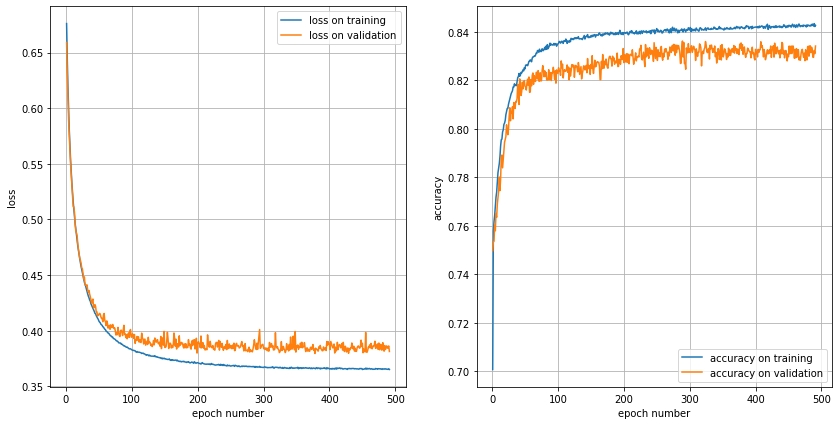

Early stopping on epoch = 498  with best accuracy on train = 0.8434398695361285 and best accuracy on dev = 0.83623046875


In [0]:
train(model, train_dataloader, dev_dataloader,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

#### Let's try to find optimal hyperparameters

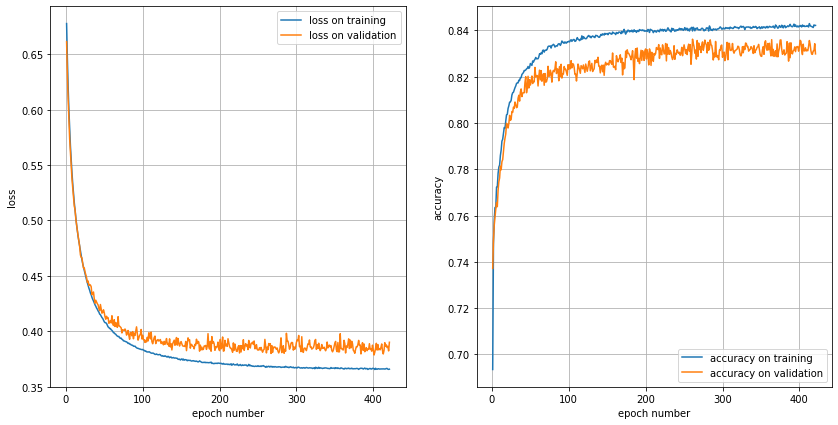

Early stopping on epoch = 426  with best accuracy on train = 0.842976416146298 and best accuracy on dev = 0.83623046875


In [0]:
train(model, train_dataloader, dev_dataloader,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [0]:
N_EPOCHS = 3000
LEARNING_RATE = 1e-3

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()


sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.5)

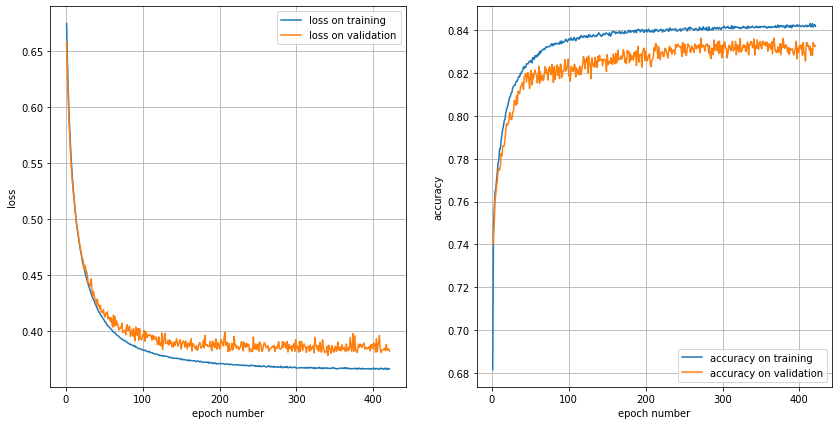

Early stopping on epoch = 425  with best accuracy on train = 0.8431088314005353 and best accuracy on dev = 0.836328125


In [0]:
train(model, train_dataloader_all, dev_dataloader_all,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [0]:
N_EPOCHS = 3000
LEARNING_RATE = 1e-3

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)
criterion = nn.BCEWithLogitsLoss()


sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.5)

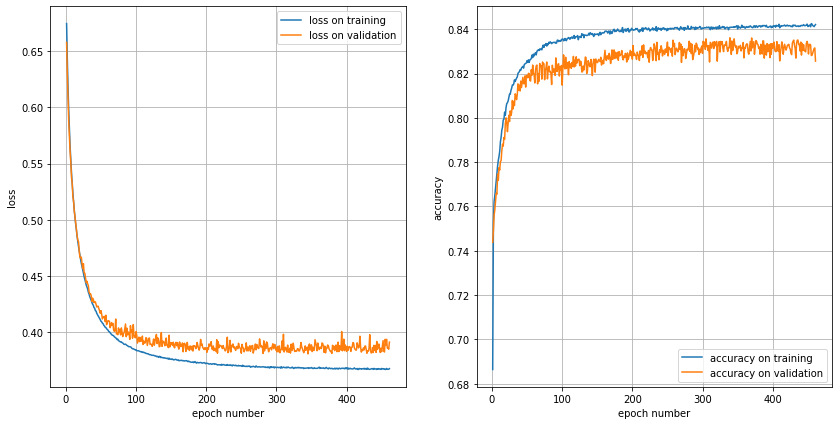

Early stopping on epoch = 466  with best accuracy on train = 0.8425373550401427 and best accuracy on dev = 0.8361328125


In [0]:
train(model, train_dataloader_all, dev_dataloader_all,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [0]:
N_EPOCHS = 3000
LEARNING_RATE = 1e-2

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()

sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.1)

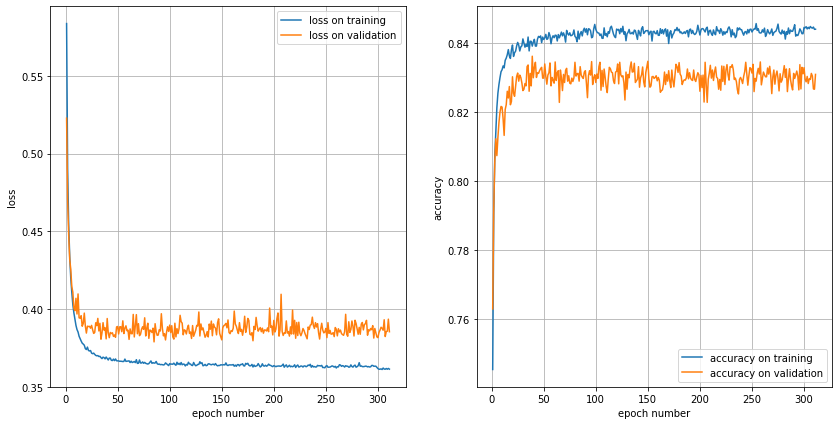

Early stopping on epoch = 319  with best accuracy on train = 0.8456909288581624 and best accuracy on dev = 0.83623046875


In [0]:
train(model, train_dataloader, dev_dataloader,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [0]:
N_EPOCHS = 3000
LEARNING_RATE = 1e-4

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()

sched1 = StepLR(optimizer, step_size=N_EPOCHS//2, gamma = 0.5)

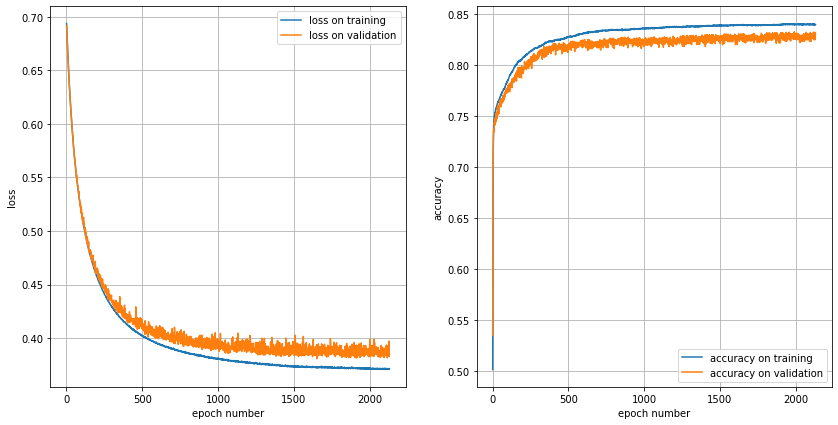

Early stopping on epoch = 2132  with best accuracy on train = 0.8408717105263158 and best accuracy on dev = 0.8326171875


In [0]:
train(model, train_dataloader, dev_dataloader,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//4)

### 2.2 Use word embeddings for text classification - FFNN

Use the same pre-trained word embeddings, but use instead of Logistic Regression a feedforward neural network. For both logistic regression and FFNN model, perform tuning of meta-parameters, such as the learning rate.

In [0]:
class FFNNBow(nn.Module):
    def __init__(self, vocab_size, num_classes, hidden_layer_size=8):
        super().__init__()
        self.hidden_layer = nn.Linear(vocab_size, hidden_layer_size)
        self.relu = nn.Tanh()
        self.output_layer = nn.Linear(hidden_layer_size, num_classes)
        
        self.init_weights()
        
    def init_weights(self):
        initrange = 0.5
        
        self.hidden_layer.weight.data.uniform_(-initrange, initrange)
        self.hidden_layer.bias.data.zero_()
        
        self.output_layer.weight.data.uniform_(-initrange, initrange)
        self.output_layer.bias.data.zero_()
    
    def forward(self, features):
        intermid = self.hidden_layer(features)
        intermid = self.relu(intermid)
        intermid = self.output_layer(intermid)
        output = F.log_softmax(intermid, dim=1) #output = intermid #
        return output

In [0]:
N_EPOCHS = 1000
LEARNING_RATE = 1e-3
hidden_layer_size = 64
NUM_LABELS = len(set(y_train))

model = FFNNBow(emb_dim, NUM_LABELS,hidden_layer_size)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()

sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.1)

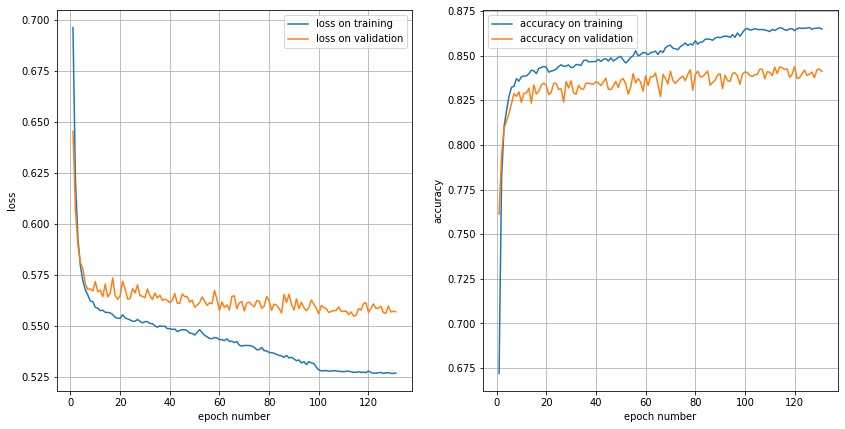

Early stopping on epoch = 139  with best accuracy on train = 0.8665289083407671 and best accuracy on dev = 0.84384765625


In [0]:
train(model, train_dataloader, dev_dataloader,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

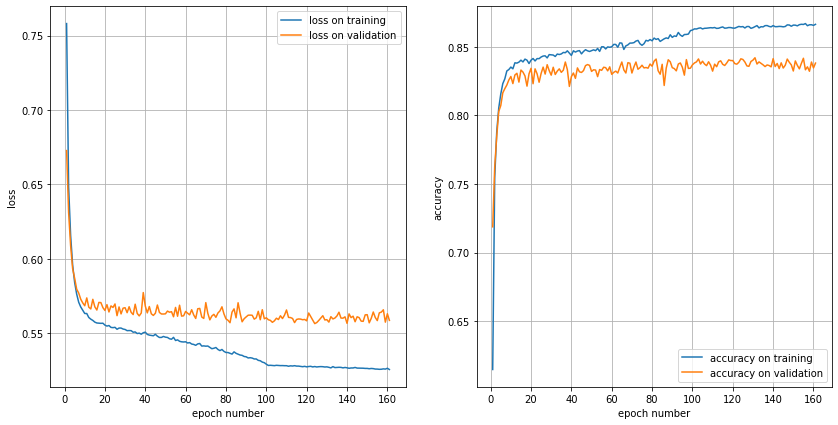

Early stopping on epoch = 164  with best accuracy on train = 0.8668878233719893 and best accuracy on dev = 0.8419921875


In [0]:
train(model, train_dataloader, dev_dataloader,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

### there I have shuffled data that is why it is not rigth value (and in other cells during 2 chapter)

In [0]:
preds_dev_b = predict(model,dev_b_dataloader)
accuracy_score(y_dev_b,preds_dev_b)

0.5015

In [0]:
N_EPOCHS = 1000
LEARNING_RATE = 1e-3
hidden_layer_size = 32
NUM_LABELS = len(set(y_train))

model = FFNNBow(emb_dim, NUM_LABELS,hidden_layer_size)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()

sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.5)

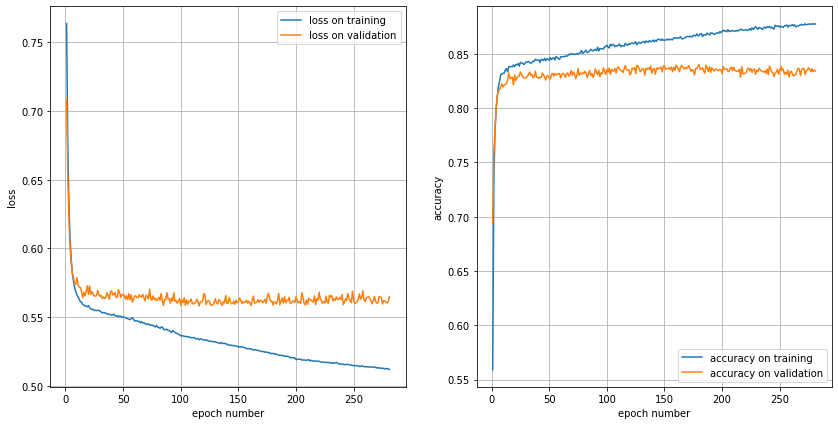

Early stopping on epoch = 284  with best accuracy on train = 0.8784950657894737 and best accuracy on dev = 0.8400390625


In [0]:
train(model, train_dataloader, dev_dataloader,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//5)

In [0]:
preds_dev_b = predict(model,dev_b_dataloader)
accuracy_score(y_dev_b,preds_dev_b)

0.495

In [0]:
N_EPOCHS = 1000
LEARNING_RATE = 1e-3
hidden_layer_size = 64
NUM_LABELS = len(set(y_train))

model = FFNNBow(emb_dim, NUM_LABELS,hidden_layer_size)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE,weight_decay=1e-5)
criterion = nn.BCEWithLogitsLoss()

sched1 = StepLR(optimizer, step_size=N_EPOCHS//3, gamma = 0.5)

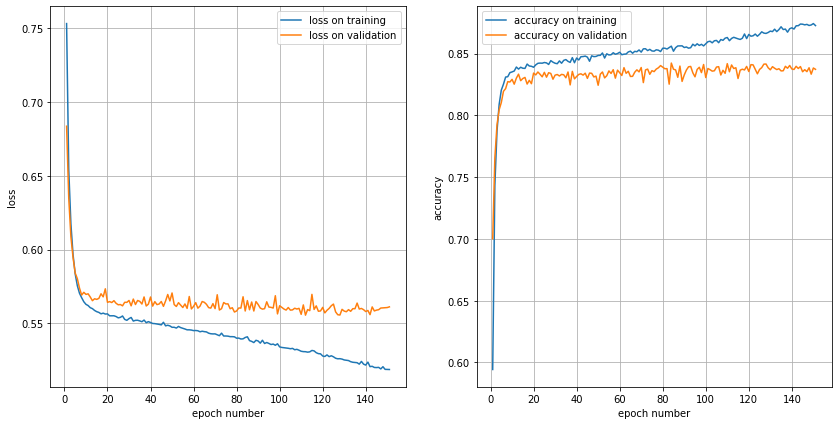

Early stopping on epoch = 158  with best accuracy on train = 0.8767736674843889 and best accuracy on dev = 0.84228515625


In [0]:
train(model, train_dataloader, dev_dataloader,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [0]:
N_EPOCHS = 1000
LEARNING_RATE = 1e-4
hidden_layer_size = 64
NUM_LABELS = len(set(y_train))

model = FFNNBow(emb_dim, NUM_LABELS,hidden_layer_size)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE,weight_decay=1e-5)
criterion = nn.BCEWithLogitsLoss()


sched1 = StepLR(optimizer, step_size=N_EPOCHS, gamma = 0.5)

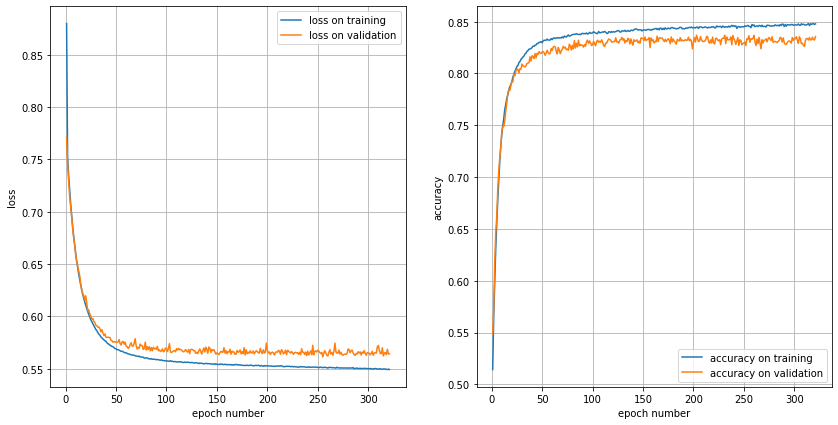

Early stopping on epoch = 322  with best accuracy on train = 0.8480987957181088 and best accuracy on dev = 0.8369140625


In [0]:
train(model, train_dataloader, dev_dataloader,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//5)

In [0]:
preds_dev_b = predict(model,dev_b_dataloader)
accuracy_score(y_dev_b,preds_dev_b)

0.48

In [0]:
N_EPOCHS = 1000
LEARNING_RATE = 1e-4
hidden_layer_size = 16
NUM_LABELS = len(set(y_train))

model_ff = FFNNBow(emb_dim, NUM_LABELS,hidden_layer_size)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE,)
criterion = nn.BCEWithLogitsLoss()


sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.5)

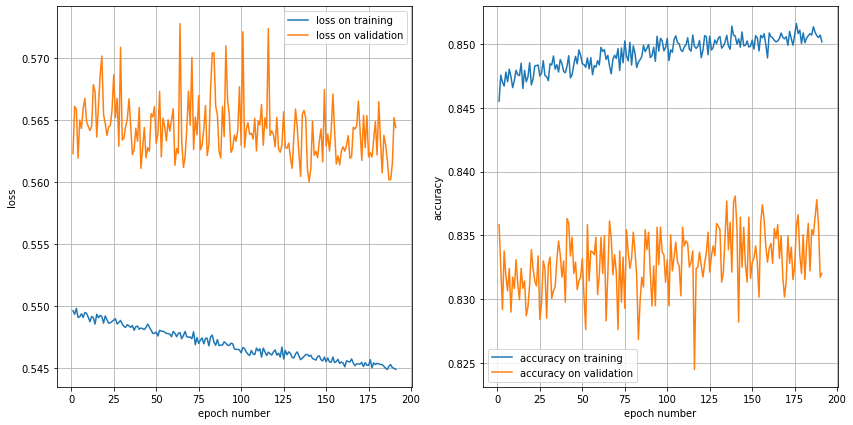

Early stopping on epoch = 200  with best accuracy on train = 0.8515764384478145 and best accuracy on dev = 0.8380859375


In [0]:
train(model, train_dataloader, dev_dataloader,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//5)

### We can see that model with low hidden layer size cannot learn

### 2.3 Use of document embeddings for text classification 

Use ``gensim`` to obtain document embeddings for all reviews. Build a model based on logistic regression using ``sklearn`` which load these embeddings for each document and performs a classification. 

[use_link](https://github.com/susanli2016/NLP-with-Python/blob/master/Doc2Vec%20Consumer%20Complaint.ipynb)

**Loading the pre-trained GloVe word vectors**

In [15]:
train_texts, test_texts, dev_texts = read_data('train.texts'),read_data('test.texts'),read_data('dev.texts')
dev_b_texts, test_b_texts = read_data('dev-b.texts'),read_data('test-b.texts')
train_labels , dev_labels, dev_b_labels =  read_data('train.labels'), read_data('dev.labels'), read_data('dev-b.labels')

In [16]:
train_texts = preprocess(train_texts, punctuation=True)
test_texts = preprocess(test_texts, punctuation=True)
dev_texts = preprocess(dev_texts, punctuation=True)

dev_b_texts = preprocess(dev_b_texts, punctuation=True)
test_b_texts = preprocess(test_b_texts, punctuation=True)

In [17]:
train_texts_tok_all = tokenization_gram(train_texts,gram_range = (1,1))
dev_texts_tok_all = tokenization_gram(dev_texts,gram_range = (1,1))
dev_b_texts_tok_all = tokenization_gram(dev_b_texts,gram_range = (1,1))

test_texts_tok_all = tokenization_gram(test_texts,gram_range = (1,1))
test_b_texts_tok_all = tokenization_gram(test_b_texts,gram_range = (1,1))

In [18]:
train_texts = preprocess(train_texts, stop_words=True,punctuation=True)
test_texts = preprocess(test_texts, stop_words=True,punctuation=True)
dev_texts = preprocess(dev_texts, stop_words=True,punctuation=True)

dev_b_texts = preprocess(dev_b_texts, stop_words=True,punctuation=True)
test_b_texts = preprocess(test_b_texts, stop_words=True,punctuation=True)

In [19]:
train_texts_tok = tokenization_gram(train_texts,gram_range = (1,1))
dev_texts_tok = tokenization_gram(dev_texts,gram_range = (1,1))
dev_b_texts_tok = tokenization_gram(dev_b_texts,gram_range = (1,1))

test_texts_tok = tokenization_gram(test_texts,gram_range = (1,1))
test_b_texts_tok = tokenization_gram(test_b_texts,gram_range = (1,1))

In [20]:
from gensim.models.keyedvectors import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import common_texts
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

In [24]:
documents_train = [TaggedDocument(words=doc, tags=[tag]) for doc,tag in zip(train_texts_tok_all,y_train)]
documents_dev = [TaggedDocument(words=doc, tags=[tag]) for doc,tag in zip(dev_texts_tok,y_dev)]
documents_dev_b = [TaggedDocument(words=doc, tags=[tag]) for doc,tag in zip(dev_b_texts_tok,y_dev_b)]
# documents_test = [TaggedDocument(words=doc) for doc in test_texts_tok]

In [25]:
documents_train[1]

TaggedDocument(words=['i', 'gave', 'this', 'movie', 'a', '10', 'because', 'it', 'needed', 'to', 'be', 'rewarded', 'for', 'its', 'scary', 'elements', 'and', 'actors', 'and', 'my', 'god', 'the', 'enging', '!', 'the', 'thing', 'is', 'i', 'don', "'", 't', 'want', 'to', 'tell', 'anyone', 'anything', 'about', 'the', 'acting', 'or', 'story', 'because', 'it', 'will', 'ruin', 'the', 'movie', '.', 'but', 'i', 'will', 'recommend', 'that', 'you', 'go', 'straight', 'to', 'your', 'nearest', 'moviestore', 'right', 'now', 'and', 'rent', 'it', '!', '(', 'don', "'", 't', 'forget', 'popcorn', '!', ')'], tags=[1])

In [23]:
model_dbow = Doc2Vec(vector_size=300, min_count=2, epochs=10, workers=2)
model_dbow.build_vocab(documents_train)


In [24]:
%%time
model_dbow.train(documents_train, total_examples=model_dbow.corpus_count, epochs=model_dbow.epochs)

CPU times: user 51.1 s, sys: 310 ms, total: 51.4 s
Wall time: 26.5 s


Building the Final Vector Feature for the Classifier

In [25]:
def vec_for_learning(model, tagged_docs):
    regressors = [model.infer_vector(doc.words) for doc in tagged_docs]
    return regressors

In [26]:
X_train = vec_for_learning(model_dbow, documents_train)

In [27]:
X_dev = vec_for_learning(model_dbow, documents_dev)
X_dev_b = vec_for_learning(model_dbow, documents_dev_b)

In [35]:
X_dev_test = [model_dbow.infer_vector(doc) for doc in dev_texts_tok]

In [0]:
model_dbow_alpha = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=2, alpha=0.065, min_alpha=0.065)
model_dbow_alpha.build_vocab(documents_train)

In [0]:
def train_d2v(model_dbow_alpha, documents_train, documents_dev, documents_dev_b, alpha_chng=0.002,n_epoch=30):
    accuracy_doc = np.zeros((n_epoch,3))
    for epoch in tqdm_notebook(range(n_epoch)):
        print('epoch =',epoch)
        model_dbow_alpha.train(documents_train, total_examples=model_dbow_alpha.corpus_count, epochs=1)
        model_dbow_alpha.alpha -= alpha_chng
        model_dbow_alpha.min_alpha = model_dbow_alpha.alpha

        X_train = vec_for_learning(model_dbow_alpha, documents_train)
        X_dev = vec_for_learning(model_dbow_alpha, documents_dev)
        X_dev_b = vec_for_learning(model_dbow_alpha, documents_dev_b)

        logreg = LogisticRegression(random_state=42, n_jobs=-1, C=0.1)
        logreg.fit(X_train,y_train)

        pred_train = logreg.predict(X_train)
        pred_test = logreg.predict(X_dev)
        pred_test_b = logreg.predict(X_dev_b)
        # print("Train accuracy: ", accuracy_score(pred_train, y_train))
        # print("Dev accuracy: ", accuracy_score(pred_test, y_dev))
        # print("Dev-b accuracy: ", accuracy_score(pred_test_b, y_dev_b))
        accuracy_doc[epoch] = np.array([accuracy_score(pred_train, y_train), accuracy_score(pred_test, y_dev), accuracy_score(pred_test_b, y_dev_b)])
        clear_output(True)
        plt.figure(figsize=(14, 7))
        plt.plot(range(epoch+1),accuracy_doc[:epoch+1,0],label='train')
        plt.plot(range(epoch+1),accuracy_doc[:epoch+1,1],label='dev')
        plt.plot(range(epoch+1),accuracy_doc[:epoch+1,2],label='dev_b')
        plt.ylabel('accuracy')
        plt.xlabel('epoch number')
        plt.grid()
        plt.legend()
        plt.show()
        
    return accuracy_doc

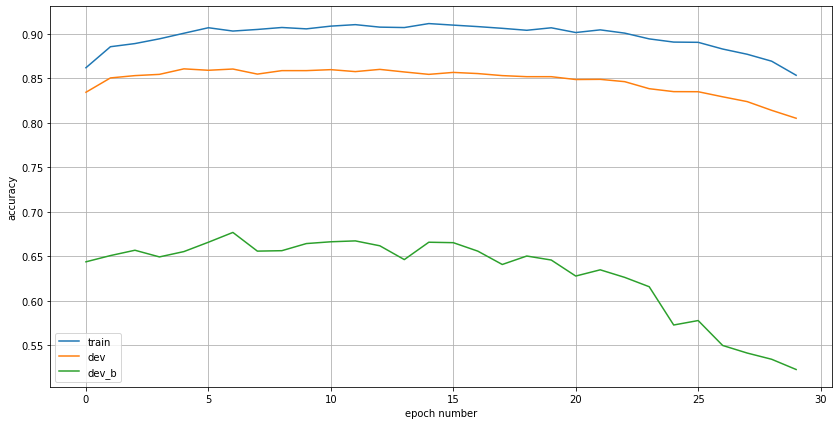

In [0]:
train_d2v(model_dbow_alpha, documents_train, documents_dev, documents_dev_b, alpha_chng=0.002,n_epoch=30):

In [0]:
model_dbow_bst = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow_bst.build_vocab(documents_train)

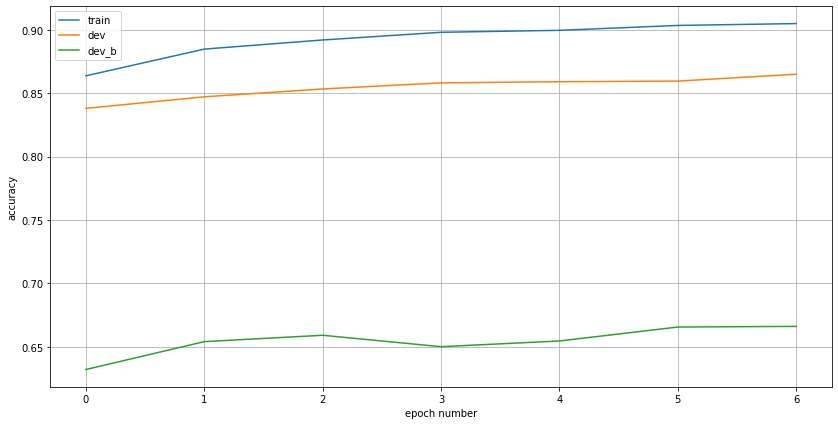

In [0]:
train_d2v(model_dbow_bst, documents_train, documents_dev, documents_dev_b, alpha_chng=0.002,n_epoch=7)

In [0]:
X_train_alpha = vec_for_learning(model_dbow_alpha, documents_train)
X_dev_alpha = vec_for_learning(model_dbow_alpha, documents_dev)
X_dev_b_alpha = vec_for_learning(model_dbow_alpha, documents_dev_b)

In [0]:
X_train_bst = vec_for_learning(model_dbow_bst, documents_train)
X_dev_bst = vec_for_learning(model_dbow_bst, documents_dev)
X_dev_b_bst = vec_for_learning(model_dbow_bst, documents_dev_b)

**Building a predictive model on the averaged word vectors**

In [29]:
logreg = LogisticRegression(random_state=42, n_jobs=-1)
logreg.fit(X_train,y_train)

/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andrey/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=42,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [36]:
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_dev)
pred_test_b = logreg.predict(X_dev_b)
print("Train accuracy: ", accuracy_score(pred_train, y_train))
print("Dev accuracy: ", accuracy_score(pred_test, y_dev))
print("Dev-b accuracy: ", accuracy_score(pred_test_b, y_dev_b))

Train accuracy:  0.9308666666666666
Dev accuracy:  0.8381
Dev-b accuracy:  0.682


In [37]:
pred_test = logreg.predict(X_dev_test)
print("Dev accuracy: ", accuracy_score(pred_test, y_dev))

Dev accuracy:  0.8403


In [0]:
logreg = LogisticRegression(random_state=42, n_jobs=-1)
logreg.fit(X_train_bst,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=42,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [0]:
pred_train = logreg.predict(X_train_bst)
pred_test = logreg.predict(X_dev_bst)
pred_test_b = logreg.predict(X_dev_b_bst)
print("Train accuracy: ", accuracy_score(pred_train, y_train))
print("Dev accuracy: ", accuracy_score(pred_test, y_dev))
print("Dev-b accuracy: ", accuracy_score(pred_test_b, y_dev_b))

Train accuracy:  0.9066666666666666
Dev accuracy:  0.8621
Dev-b accuracy:  0.644


In [0]:
%%time

param_grid_logit = {'C':  np.logspace(-5, 3, 9)}
logreg = LogisticRegression(random_state=42, n_jobs=-1)
grid_logit = GridSearchCV(logreg, param_grid_logit, cv=3, n_jobs=-1)

grid_logit.fit(X_train_bst, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


CPU times: user 18.7 s, sys: 676 ms, total: 19.3 s
Wall time: 58.4 s


In [0]:
grid_logit.best_params_, grid_logit.best_score_

({'C': 0.1}, 0.8876)

In [0]:
grid_logit.score(X_dev_bst, y_dev)

0.8626

In [0]:
logreg = LogisticRegression(random_state=42, n_jobs=-1,C=0.1)
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=42,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [0]:
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_dev)
pred_test_b = logreg.predict(X_dev_b)
print("Train accuracy: ", accuracy_score(pred_train, y_train))
print("Dev accuracy: ", accuracy_score(pred_test, y_dev))
print("Dev-b accuracy: ", accuracy_score(pred_test_b, y_dev_b))

Train accuracy:  0.9616666666666667
Dev accuracy:  0.8348
Dev-b accuracy:  0.651


In [0]:
logreg_sgd = SGDClassifier(loss='log',random_state=42, n_jobs=-1,alpha=0.0001,penalty='elasticnet')
logreg_sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='elasticnet', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [0]:
pred_train = logreg_sgd.predict(X_train)
pred_test = logreg_sgd.predict(X_dev)

pred_test_b = logreg_sgd.predict(X_dev_b)
print("Train accuracy: ", accuracy_score(pred_train, y_train))
print("Dev accuracy: ", accuracy_score(pred_test, y_dev))
print("Dev-b accuracy: ", accuracy_score(pred_test_b, y_dev_b))

Train accuracy:  0.9595333333333333
Dev accuracy:  0.8296
Dev-b accuracy:  0.6385


In [0]:
model_dbow.save('d2v_model_dbow.doc2vec')
model_dbow_bst.save('d2v_model_dbow_bst.doc2vec')

When we have model without alpha decreasing, it(X_train,X_dev, X_dev_b) is overfitting but have high values.

When we try to tune alpha and epochs it cann't achieve value better the withoutalpha decreasing

## 3. Research part

### 3.1 Different embedding models

Compare performance of [GloVe](http://nlp.stanford.edu/data/wordvecs/glove.6B.zip), [word2vec](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing) and [fastText](https://fasttext.cc/docs/en/english-vectors.html) models. Plot the results depending on the type of used embeddings. 

In [0]:
!unzip wiki-news-300d-1M.vec.zip

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [0]:
!unzip crawl-300d-2M.vec.zip

Archive:  crawl-300d-2M.vec.zip
  inflating: crawl-300d-2M.vec       




---
# **fastText**



In [ ]:
%time
fasttext_model = Vectors(f'wiki-news-300d-1M.vec', cache='./embeddings/')

In [0]:
fasttext_model.stoi['a'],fasttext_model.stoi['A']

In [0]:
glove_model.stoi['a'],glove_model.stoi['A']

KeyError: ignored

### As we can see, we shouldn't make lowercase of string for making embeddings 

In [0]:
start = time.time()
train_dataset_fastt = СurrentDataset(text_data=train_texts_tok, target_data=torch.FloatTensor(y_enc_train),model=fasttext_model)
print('train_dataset_fastt time = ',time.time()-start)
start = time.time()
dev_dataset_fastt = СurrentDataset(text_data=dev_texts_tok, target_data=torch.FloatTensor(y_enc_dev),model=fasttext_model)
print('dev_dataset_fastt time = ',time.time()-start)
start = time.time()
dev_b_dataset_fastt = СurrentDataset(text_data=dev_b_texts_tok, target_data=torch.FloatTensor(y_enc_dev_b),model=fasttext_model)
print('dev_b_dataset_fastt time = ',time.time()-start)
start = time.time()

train_dataset_all_fastt = СurrentDataset(text_data=train_texts_tok_all, target_data=torch.FloatTensor(y_enc_train),model=fasttext_model)
print('train_dataset_all_fastt time = ',time.time()-start)
start = time.time()
dev_dataset_all_fastt = СurrentDataset(text_data=dev_texts_tok_all, target_data=torch.FloatTensor(y_enc_dev),model=fasttext_model)
print('dev_dataset_all_fastt time = ',time.time()-start)
start = time.time()
dev_b_dataset_all_fastt = СurrentDataset(text_data=dev_b_texts_tok_all, target_data=torch.FloatTensor(y_enc_dev_b),model=fasttext_model)
print('dev_b_dataset time = ',time.time()-start)
start = time.time()


train_dataset_fastt time =  1170.0748200416565
dev_dataset_fastt time =  742.7482397556305
dev_b_dataset_fastt time =  13.173867225646973
train_dataset_all_fastt time =  1251.5832726955414
dev_dataset_all_fastt time =  794.6136996746063
dev_b_dataset time =  14.879933595657349


In [0]:
start = time.time()
test_dataset_fastt = СurrentDataset(text_data=test_texts_tok)
print('test_dataset time = ',time.time()-start)
start = time.time()
test_b_dataset_fastt = СurrentDataset(text_data=test_b_texts_tok)
print('test_b_dataset time = ',time.time()-start)
start = time.time()

test_dataset_all_fastt = СurrentDataset(text_data=test_texts_tok_all)
print('test_dataset_all time = ',time.time()-start)
start = time.time()
test_b_dataset_all_fastt = СurrentDataset(text_data=test_b_texts_tok_all)
print('test_b_dataset_all time = ',time.time()-start)
start = time.time()

test_dataset time =  499.25184202194214
test_b_dataset time =  19.996859312057495
test_dataset_all time =  633.5118384361267
test_b_dataset_all time =  21.47592854499817


In [0]:
%%time
train_dataloader_fastt = DataLoader(train_dataset_fastt, batch_size=BATCH_SIZE, shuffle=False)
dev_dataloader_fastt = DataLoader(dev_dataset_fastt, batch_size=BATCH_SIZE, shuffle=False)
dev_b_dataloader_fastt = DataLoader(dev_b_dataset_fastt, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader_all_fastt = DataLoader(train_dataset_all_fastt, batch_size=BATCH_SIZE, shuffle=False)
dev_dataloader_all_fastt = DataLoader(dev_dataset_all_fastt, batch_size=BATCH_SIZE, shuffle=False)
dev_b_dataloader_all_fastt = DataLoader(dev_b_dataset_all_fastt, batch_size=BATCH_SIZE, shuffle=False)

CPU times: user 342 µs, sys: 0 ns, total: 342 µs
Wall time: 348 µs


In [0]:
test_dataloader_fastt = DataLoader(test_dataset_fastt, batch_size=BATCH_SIZE, shuffle=False)
test_b_dataloader_fastt = DataLoader(test_b_dataset_fastt, batch_size=BATCH_SIZE, shuffle=False)

test_dataloader_all_fastt = DataLoader(test_dataset_all_fastt, batch_size=BATCH_SIZE, shuffle=False)
test_b_dataloader_all_fastt = DataLoader(test_b_dataset_all_fastt, batch_size=BATCH_SIZE, shuffle=False)

In [0]:
N_EPOCHS = 3000
LEARNING_RATE = 1e-3

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()


sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.5)

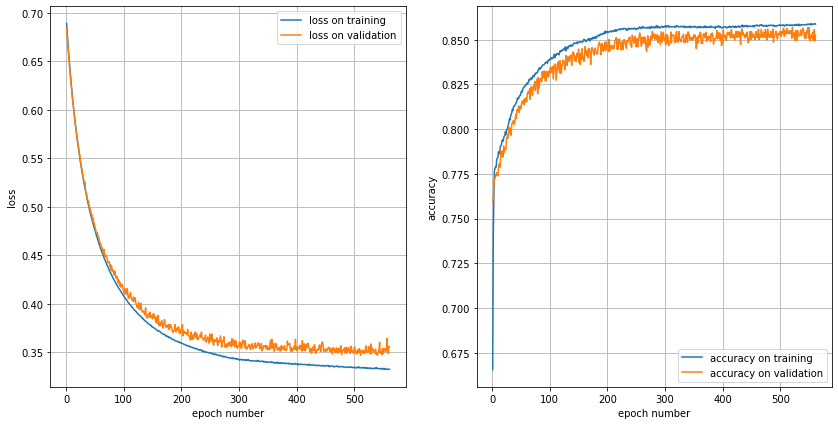

Early stopping on epoch = 569  with best accuracy on train = 0.859176377118644 and best accuracy on dev = 0.8568359375


In [0]:
train(model, train_dataloader_fastt, dev_dataloader_fastt,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [0]:
preds_dev_b = predict(model,dev_b_dataloader_fastt)
accuracy_score(y_dev_b,preds_dev_b)

0.7595

In [0]:
N_EPOCHS = 3000
LEARNING_RATE = 1e-3

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()


sched1 = StepLR(optimizer, step_size=N_EPOCHS//5, gamma = 0.5)

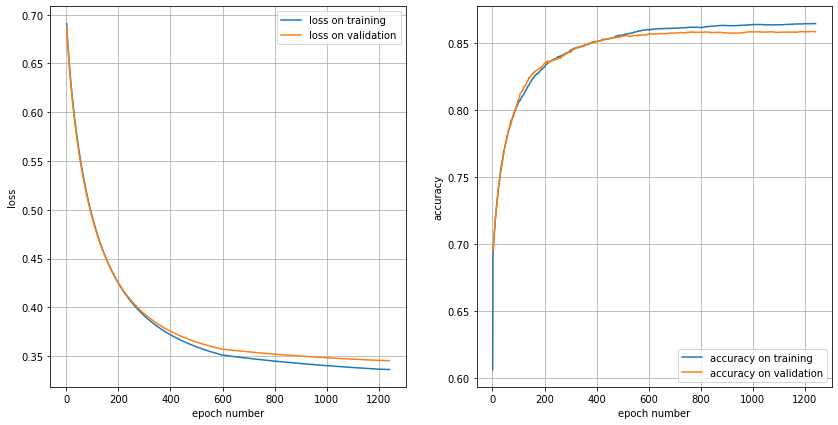

Early stopping on epoch = 1248  with best accuracy on train = 0.8643440566458519 and best accuracy on dev = 0.85830078125


In [0]:
train(model, train_dataloader_all_fastt, dev_dataloader_all_fastt,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [0]:
preds_dev_b = predict(model,dev_b_dataloader_all_fastt)
accuracy_score(y_dev_b,preds_dev_b)

0.7655

In [0]:
train_dataloader_fastt = DataLoader(train_dataset_fastt, batch_size=BATCH_SIZE, shuffle=False)
dev_dataloader_fastt = DataLoader(dev_dataset_fastt, batch_size=BATCH_SIZE, shuffle=False)
dev_b_dataloader_fastt = DataLoader(dev_b_dataset_fastt, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader_all_fastt = DataLoader(train_dataset_all_fastt, batch_size=BATCH_SIZE, shuffle=False)
dev_dataloader_all_fastt = DataLoader(dev_dataset_all_fastt, batch_size=BATCH_SIZE, shuffle=False)
dev_b_dataloader_all_fastt = DataLoader(dev_b_dataset_all_fastt, batch_size=BATCH_SIZE, shuffle=False)

In [0]:
dev_probs = predict(model,dev_dataloader_all_fastt)
train_probs = predict(model,train_dataloader_all_fastt)
test_probs = predict(model, test_dataloader_all_fastt,with_label=False)
dev_b_probs = predict(model,dev_b_dataloader_all_fastt)
test_b_probs = predict(model,test_b_dataloader_all_fastt,with_label=False)

In [0]:
ind_train = [ 'train/'+str(i) for i in range(0,len(train_probs))]
ind_dev = [ 'dev/'+str(i) for i in range(0,len(dev_probs))]
ind_test = [ 'test/'+str(i) for i in range(0,len(test_probs))]
ind_devb = [ 'dev-b/'+str(i) for i in range(0,len(dev_b_probs))]
ind_testb = [ 'test-b/'+str(i) for i in range(0,len(test_b_probs))]
inds = ind_train+ind_dev +ind_test +ind_devb +ind_testb
final = pd.Series(list(train_probs)+list(dev_probs)+list(test_probs)+list(dev_b_probs)+list(test_b_probs))
final.index = inds

In [0]:
final.replace({0.0: 'neg', 1.0: 'pos'},inplace=True)
final.head()

train/0    neg
train/1    neg
train/2    neg
train/3    neg
train/4    pos
dtype: object

In [0]:
final.to_csv('preds_fastt_all_ffnn_lr_1e3.tsv',sep='\t',header=False)


#### I tried this file but have 49% on test. It was very strange for me because I don't think that shuffling can influence on it

In [0]:
N_EPOCHS = 3000
LEARNING_RATE = 1e-2

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()

sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.1)

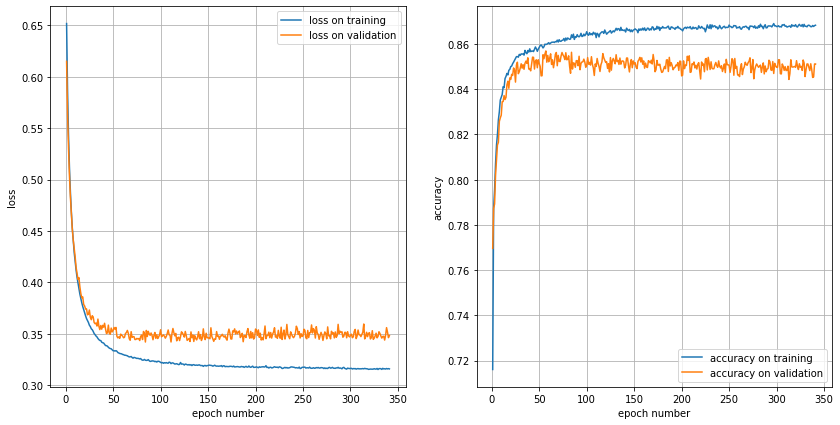

Early stopping on epoch = 342  with best accuracy on train = 0.8690447981712756 and best accuracy on dev = 0.85693359375


In [0]:
train(model, train_dataloader_fastt, dev_dataloader_fastt,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [0]:
preds_dev_b = predict(model,dev_b_dataloader_fastt)
accuracy_score(y_dev_b,preds_dev_b)

0.753

In [0]:
N_EPOCHS = 1000
LEARNING_RATE = 1e-2

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE,weight_decay=1e-5)
criterion = nn.BCEWithLogitsLoss()

sched1 = StepLR(optimizer, step_size=N_EPOCHS//5, gamma = 0.1)

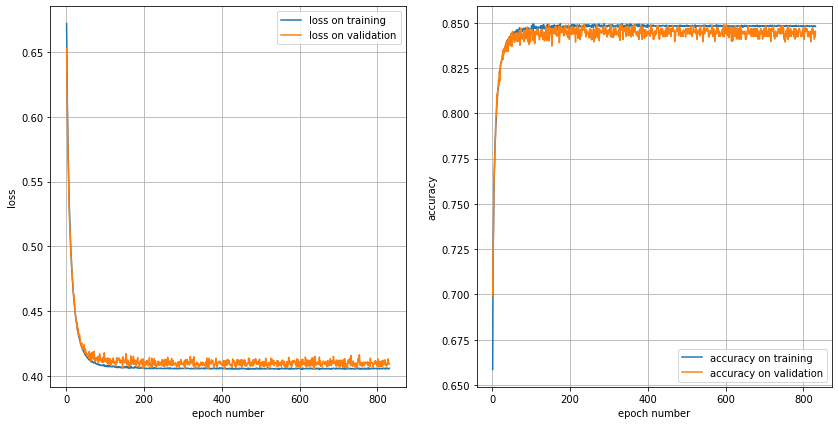

Early stopping on epoch = 836  with best accuracy on train = 0.849492640499554 and best accuracy on dev = 0.8494140625


In [0]:
train(model,train_dataloader_all_fastt, dev_dataloader_all_fastt,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//5)

In [0]:
N_EPOCHS = 1000
LEARNING_RATE = 1e-3
hidden_layer_size = 32
NUM_LABELS = len(set(y_train))

model = FFNNBow(emb_dim, NUM_LABELS,hidden_layer_size)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()

sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.5)

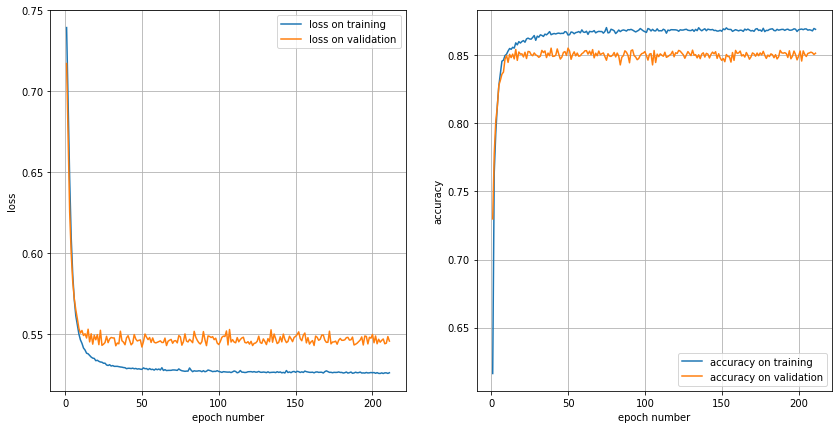

Early stopping on epoch = 211  with best accuracy on train = 0.8702713815789475 and best accuracy on dev = 0.85517578125


In [0]:
train(model, train_dataloader_fastt, dev_dataloader_fastt,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//5)



---
# **word2vec**



In [33]:
%time
w2v_model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [34]:
w2v_model['A'],w2v_model['a']

KeyError: ignored

In [37]:
w2v_model.vectors

array([[ 1.1291504e-03, -8.9645386e-04,  3.1852722e-04, ...,
        -1.5640259e-03, -1.2302399e-04, -8.6307526e-05],
       [ 7.0312500e-02,  8.6914062e-02,  8.7890625e-02, ...,
        -4.7607422e-02,  1.4465332e-02, -6.2500000e-02],
       [-1.1779785e-02, -4.7363281e-02,  4.4677734e-02, ...,
         7.1289062e-02, -3.4912109e-02,  2.4169922e-02],
       ...,
       [-1.9653320e-02, -9.0820312e-02, -1.9409180e-02, ...,
        -1.6357422e-02, -1.3427734e-02,  4.6630859e-02],
       [ 3.2714844e-02, -3.2226562e-02,  3.6132812e-02, ...,
        -8.8500977e-03,  2.6977539e-02,  1.9042969e-02],
       [ 4.5166016e-02, -4.5166016e-02, -3.9367676e-03, ...,
         7.9589844e-02,  7.2265625e-02,  1.3000488e-02]], dtype=float32)

In [0]:
train_texts, test_texts, dev_texts = read_data('train.texts'),read_data('test.texts'),read_data('dev.texts')
dev_b_texts, test_b_texts = read_data('dev-b.texts'),read_data('test-b.texts')
train_labels , dev_labels, dev_b_labels =  read_data('train.labels'), read_data('dev.labels'), read_data('dev-b.labels')


In [0]:
train_texts = preprocess(train_texts, punctuation=True)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer()
tf_idf_vectorizer.fit(train_texts)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
tf_idf_result = tf_idf_vectorizer.fit_transform(raw_documents=train_texts)

In [0]:
from collections import Counter, defaultdict
max_idf = max(tf_idf_vectorizer.idf_)
word2weight = defaultdict(lambda: max_idf,[(w, tf_idf_vectorizer.idf_[i]) for w, i in tf_idf_vectorizer.vocabulary_.items()])

#### I think that TFIDF can help there to improve accuracy on datasets because it willinclude information about word influence through all documents

In [0]:
import torch
from torch.utils.data import DataLoader, Dataset

class СurrentDatasetW2V(Dataset):
  def __init__(self,text_data, target_data=None,model=w2v_model):
    self.target_data = target_data
    

    self.model = model

    self.data = torch.tensor([list(self.get_phrase_embedding(l)) for l in text_data])

  def __len__(self):
        return len(self.data)
    
  def __getitem__(self, i):
      if self.target_data is not None:
          return self.data[i], self.target_data[i]
      else:
          return self.data[i]

  def get_phrase_embedding(self,train_texts_token):
    """
    Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    
    vector = np.zeros(self.model.vectors.shape[1],dtype=np.float32)
     
    used_words = 0
    
    for word in train_texts_token:
        if word in self.model:
            vector += self.model[word]
            used_words += 1
    
    if used_words > 0:
        vector = vector / used_words
    
    return vector

In [0]:
import torch
from torch.utils.data import DataLoader, Dataset

class СurrentDatasetW2VtfIdf(Dataset):
  def __init__(self,text_data, target_data=None,model=w2v_model,tf_idf_result=tf_idf_result):
    self.target_data = target_data
    

    self.model = model
    self.tf_idf =tf_idf_result
    self.col_num =list(tf_idf_vectorizer.get_feature_names())

    self.data = torch.tensor([list(self.get_phrase_embedding(l,num)) for num,l in tqdm_notebook(enumerate(text_data))])

  def __len__(self):
        return len(self.data)
    
  def __getitem__(self, i):
      if self.target_data is not None:
          return self.data[i], self.target_data[i]
      else:
          return self.data[i]

  def get_phrase_embedding(self,train_texts_token,num):
    """
    Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    # 1. lowercase phrase
    # 2. tokenize phrase
    # 3. average word vectors for all words in tokenized phrase
    # skip words that are not in model's vocabulary
    # if all words are missing from vocabulary, return zeros
    
    vector = np.zeros(self.model.vectors.shape[1],dtype=np.float32)
     
    used_words = 0
    
    for word in train_texts_token:
        if word in self.model:
            if word in self.col_num:
                word_idx = self.col_num.index(word)
                vector += self.model[word] * self.tf_idf[num,word_idx]
            else:
                mean_word = 1/len(train_texts_token)
                vector += self.model[word] * mean_word
            used_words += 1
    
    if used_words > 0:
        vector = vector / used_words
    
    return vector

In [0]:
import torch
from torch.utils.data import DataLoader, Dataset

class СurrentDatasetW2VTIweight(Dataset):
  def __init__(self,text_data, target_data=None,model=w2v_model,tf_idf_result=word2weight):
    self.target_data = target_data
    

    self.model = model
    self.tf_idf =tf_idf_result

    self.data = torch.tensor([list(self.get_phrase_embedding(l)) for l in text_data])

  def __len__(self):
        return len(self.data)
    
  def __getitem__(self, i):
      if self.target_data is not None:
          return self.data[i], self.target_data[i]
      else:
          return self.data[i]

  def get_phrase_embedding(self,train_texts_token):
    """
    Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    # 1. lowercase phrase
    # 2. tokenize phrase
    # 3. average word vectors for all words in tokenized phrase
    # skip words that are not in model's vocabulary
    # if all words are missing from vocabulary, return zeros
    
    vector = np.zeros(self.model.vectors.shape[1],dtype=np.float32)
     
    used_words = 0
    mean_word = np.mean(list(word2weight.values()))
    for word in train_texts_token:
        if word in self.model:
            if word in self.tf_idf:
                vector += self.model[word] * self.tf_idf[word]
            else:
                vector += self.model[word] * mean_word
            used_words += 1
    
    if used_words > 0:
        vector = vector / used_words
    
    return vector

In [43]:
start = time.time()
train_dataset_w2vTfIdf = СurrentDatasetW2VtfIdf(text_data=train_texts_tok, target_data=torch.FloatTensor(y_enc_train))
print('train_dataset time = ',time.time()-start)
start = time.time()
dev_dataset_w2vTfIdf = СurrentDatasetW2VtfIdf(text_data=dev_texts_tok, target_data=torch.FloatTensor(y_enc_dev))
print('dev_dataset time = ',time.time()-start)
start = time.time()
dev_b_dataset_w2vTfIdf = СurrentDatasetW2VtfIdf(text_data=dev_b_texts_tok, target_data=torch.FloatTensor(y_enc_dev_b))
print('dev_b_dataset time = ',time.time()-start)
start = time.time()

train_dataset_all_w2vTfIdf = СurrentDatasetW2VtfIdf(text_data=train_texts_tok_all, target_data=torch.FloatTensor(y_enc_train))
print('train_dataset_all time = ',time.time()-start)
start = time.time()
dev_dataset_all_w2vTfIdf = СurrentDatasetW2VtfIdf(text_data=dev_texts_tok_all, target_data=torch.FloatTensor(y_enc_dev))
print('dev_dataset_all time = ',time.time()-start)
start = time.time()
dev_b_dataset_all_w2vTfIdf = СurrentDatasetW2VtfIdf(text_data=dev_b_texts_tok_all, target_data=torch.FloatTensor(y_enc_dev_b))
print('dev_b_dataset_all time = ',time.time()-start)

train_dataset time =  103.89778709411621
dev_dataset time =  63.78000354766846
dev_b_dataset time =  11.192250728607178
train_dataset_all time =  106.3887448310852
dev_dataset_all time =  70.38784980773926
dev_b_dataset_all time =  11.285399198532104


In [70]:
start = time.time()
train_dataset_w2vTIweight = СurrentDatasetW2VTIweight(text_data=train_texts_tok, target_data=torch.FloatTensor(y_enc_train))
print('train_dataset time = ',time.time()-start)
start = time.time()
dev_dataset_w2vTIweight = СurrentDatasetW2VTIweight(text_data=dev_texts_tok, target_data=torch.FloatTensor(y_enc_dev))
print('dev_dataset time = ',time.time()-start)
start = time.time()
dev_b_dataset_w2vTIweight = СurrentDatasetW2VTIweight(text_data=dev_b_texts_tok, target_data=torch.FloatTensor(y_enc_dev_b))
print('dev_b_dataset time = ',time.time()-start)
start = time.time()

train_dataset_all_w2vTIweight = СurrentDatasetW2VTIweight(text_data=train_texts_tok_all, target_data=torch.FloatTensor(y_enc_train))
print('train_dataset_all time = ',time.time()-start)
start = time.time()
dev_dataset_all_w2vTIweight = СurrentDatasetW2VTIweight(text_data=dev_texts_tok_all, target_data=torch.FloatTensor(y_enc_dev))
print('dev_dataset_all time = ',time.time()-start)
start = time.time()
dev_b_dataset_all_w2vTIweight = СurrentDatasetW2VTIweight(text_data=dev_b_texts_tok_all, target_data=torch.FloatTensor(y_enc_dev_b))
print('dev_b_dataset_all time = ',time.time()-start)

train_dataset time =  2502.385746240616


dev_dataset time =  1612.7633037567139


dev_b_dataset time =  34.75956153869629


train_dataset_all time =  4679.885598897934


dev_dataset_all time =  3052.2153317928314


dev_b_dataset_all time =  49.0193350315094


In [0]:
start = time.time()
test_dataset_w2v = СurrentDatasetW2V(text_data=test_texts_tok)
print('test_dataset time = ',time.time()-start)
start = time.time()
test_b_dataset_w2v = СurrentDatasetW2V(text_data=test_b_texts_tok)
print('test_b_dataset time = ',time.time()-start)
start = time.time()

test_dataset_all_w2v = СurrentDatasetW2V(text_data=test_texts_tok_all)
print('test_dataset_all time = ',time.time()-start)
start = time.time()
test_b_dataset_all_w2v = СurrentDatasetW2V(text_data=test_b_texts_tok_all)
print('test_b_dataset_all time = ',time.time()-start)
start = time.time()

In [44]:
start = time.time()
test_dataset_w2v = СurrentDatasetW2V(text_data=test_texts_tok)
print('test_dataset time = ',time.time()-start)
start = time.time()
test_b_dataset_w2v = СurrentDatasetW2V(text_data=test_b_texts_tok)
print('test_b_dataset time = ',time.time()-start)
start = time.time()

test_dataset_all_w2v = СurrentDatasetW2V(text_data=test_texts_tok_all)
print('test_dataset_all time = ',time.time()-start)
start = time.time()
test_b_dataset_all_w2v = СurrentDatasetW2V(text_data=test_b_texts_tok_all)
print('test_b_dataset_all time = ',time.time()-start)
start = time.time()

test_dataset time =  160.38851881027222
test_b_dataset time =  47.63008713722229
test_dataset_all time =  173.83891773223877
test_b_dataset_all time =  48.46204161643982


In [0]:
BATCH_SIZE = 256


In [0]:
train_dataloader_w2v = DataLoader(train_dataset_w2v, batch_size=BATCH_SIZE, shuffle=False)
dev_dataloader_w2v = DataLoader(dev_dataset_w2v, batch_size=BATCH_SIZE, shuffle=False)
dev_b_dataloader_w2v = DataLoader(dev_b_dataset_w2v, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader_all_w2v = DataLoader(train_dataset_all_w2v, batch_size=BATCH_SIZE, shuffle=False)
dev_dataloader_all_w2v = DataLoader(dev_dataset_all_w2v, batch_size=BATCH_SIZE, shuffle=False)
dev_b_dataloader_all_w2v = DataLoader(dev_b_dataset_all_w2v, batch_size=BATCH_SIZE, shuffle=False)

In [0]:
test_dataloader_w2v = DataLoader(test_dataset_w2v, batch_size=BATCH_SIZE, shuffle=False)
test_b_dataloader_w2v = DataLoader(test_b_dataset_w2v, batch_size=BATCH_SIZE, shuffle=False)

test_dataloader_all_w2v = DataLoader(test_dataset_all_w2v, batch_size=BATCH_SIZE, shuffle=False)
test_b_dataloader_all_w2v = DataLoader(test_b_dataset_all_w2v, batch_size=BATCH_SIZE, shuffle=False)

In [0]:
train_dataloader_w2vTfIdf = DataLoader(train_dataset_w2vTfIdf, batch_size=BATCH_SIZE, shuffle=False)
dev_dataloader_w2vTfIdf = DataLoader(dev_dataset_w2vTfIdf, batch_size=BATCH_SIZE, shuffle=False)
dev_b_dataloader_w2vTfIdf = DataLoader(dev_b_dataset_w2vTfIdf, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader_all_w2vTfIdf = DataLoader(train_dataset_all_w2vTfIdf, batch_size=BATCH_SIZE, shuffle=False)
dev_dataloader_all_w2vTfIdf = DataLoader(dev_dataset_all_w2vTfIdf, batch_size=BATCH_SIZE, shuffle=False)
dev_b_dataloader_all_w2vTfIdf = DataLoader(dev_b_dataset_all_w2vTfIdf, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
train_dataloader_w2vTIweight = DataLoader(train_dataset_w2vTIweight, batch_size=BATCH_SIZE, shuffle=False)
dev_dataloader_w2vTIweight = DataLoader(dev_dataset_w2vTIweight, batch_size=BATCH_SIZE, shuffle=False)
dev_b_dataloader_w2vTIweight = DataLoader(dev_b_dataset_w2vTIweight, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader_all_w2vTIweight = DataLoader(train_dataset_all_w2vTIweight, batch_size=BATCH_SIZE, shuffle=False)
dev_dataloader_all_w2vTIweight = DataLoader(dev_dataset_all_w2vTIweight, batch_size=BATCH_SIZE, shuffle=False)
dev_b_dataloader_all_w2vTIweight = DataLoader(dev_b_dataset_all_w2vTIweight, batch_size=BATCH_SIZE, shuffle=False)

In [0]:
N_EPOCHS = 3000
LEARNING_RATE = 1e-3

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()


sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.5)

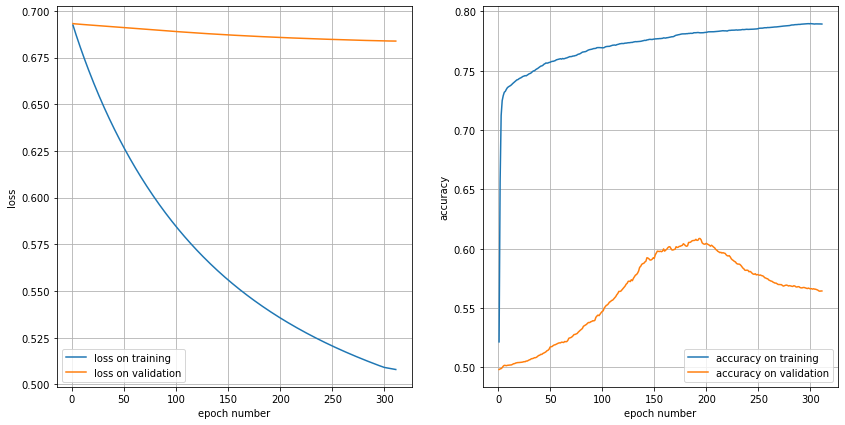

Early stopping on epoch = 318  with best accuracy on train = 0.789790783898305 and best accuracy on dev = 0.60849609375


In [74]:
train(model, train_dataloader_w2vTfIdf, dev_dataloader_w2vTfIdf,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [75]:
preds_dev_b = predict(model,dev_b_dataloader_w2vTfIdf)
accuracy_score(y_dev_b,preds_dev_b)

0.5395

### W2V embeddings with TfIdf matrix as coefficints for averaging embedding of document don't help to improve accuracy of sentiment analysis

In [0]:
N_EPOCHS = 3000
LEARNING_RATE = 1e-3

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()


sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.5)

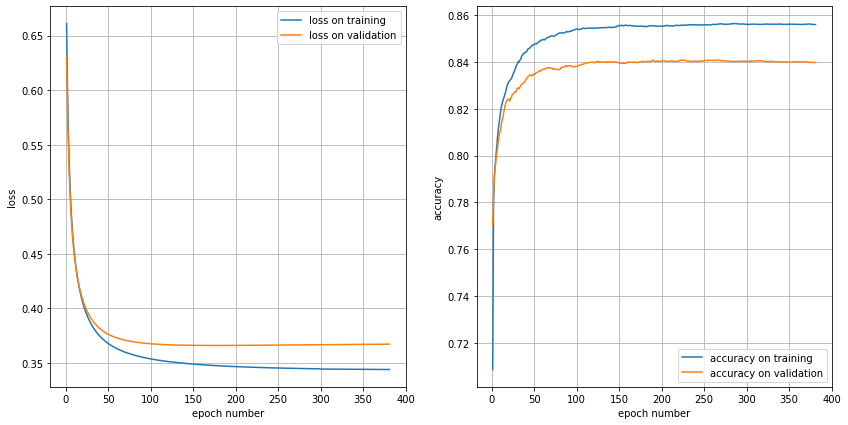

Early stopping on epoch = 383  with best accuracy on train = 0.8564235336752899 and best accuracy on dev = 0.8408203125


In [50]:
train(model, train_dataloader_w2vTIweight, dev_dataloader_w2vTIweight,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [52]:
preds_dev_b = predict(model,dev_b_dataloader_w2vTIweight)
accuracy_score(y_dev_b,preds_dev_b)

0.7465

### There also averaging word TfIdf coefficients on document dont help to achieve accuracy better clear embeddings. 

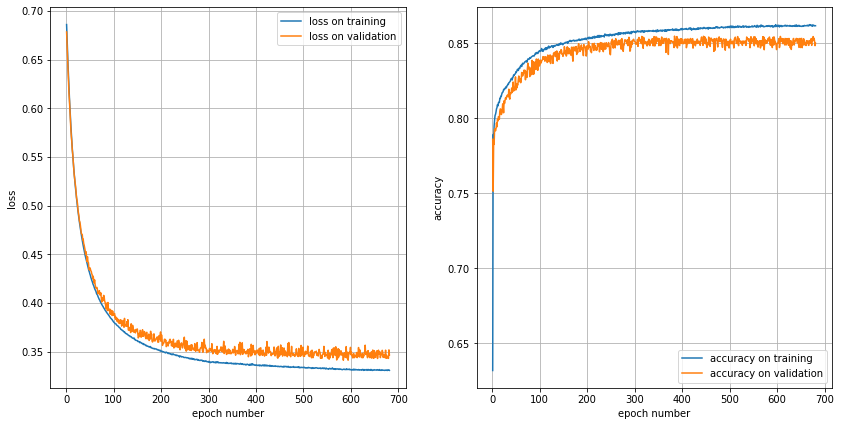

Early stopping on epoch = 683  with best accuracy on train = 0.8626052352809991 and best accuracy on dev = 0.85478515625


In [0]:
train(model, train_dataloader_w2v, dev_dataloader_w2v,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [0]:
preds_dev_b = predict(model,dev_b_dataloader_w2v)
accuracy_score(y_dev_b,preds_dev_b)

0.746

In [0]:
N_EPOCHS = 3000
LEARNING_RATE = 1e-3

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()


sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.5)

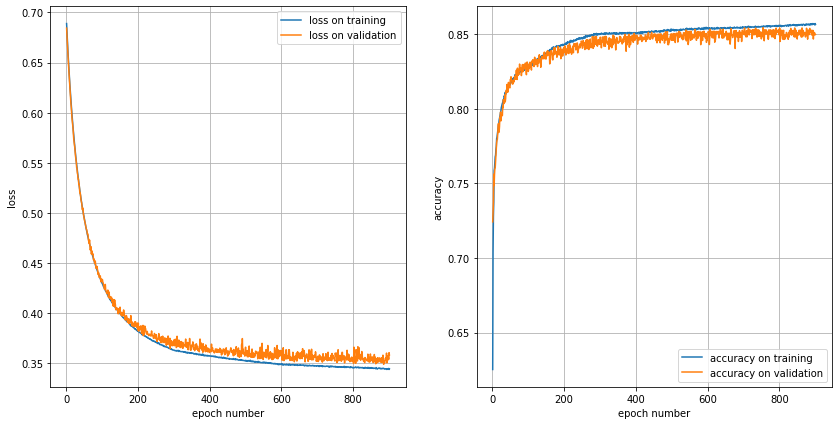

Early stopping on epoch = 901  with best accuracy on train = 0.8571309099018734 and best accuracy on dev = 0.85439453125


In [0]:
train(model, train_dataloader_all_w2v, dev_dataloader_all_w2v,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [0]:
preds_dev_b = predict(model,dev_b_dataloader_all_w2v)
accuracy_score(y_dev_b,preds_dev_b)

0.7545

In [0]:
N_EPOCHS = 1000
LEARNING_RATE = 1e-3

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE,weight_decay=1e-5)
criterion = nn.BCEWithLogitsLoss()

sched1 = StepLR(optimizer, step_size=N_EPOCHS//5, gamma = 0.1)

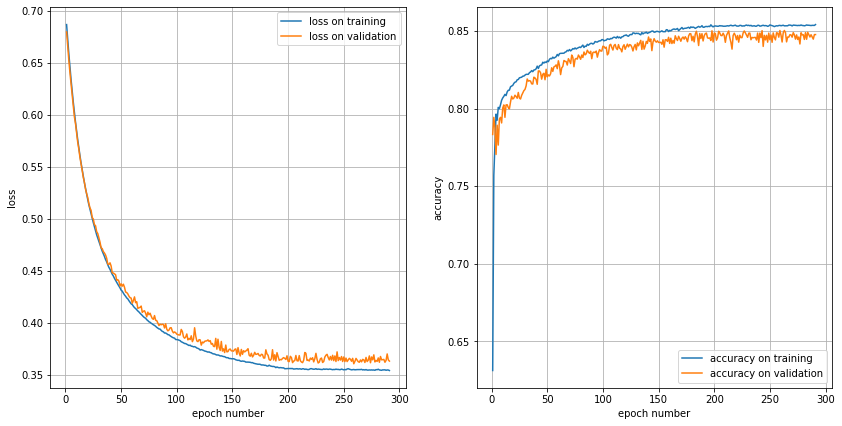

Early stopping on epoch = 299  with best accuracy on train = 0.854217774308653 and best accuracy on dev = 0.8505859375


In [0]:
train(model, train_dataloader_w2v, dev_dataloader_w2v,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [0]:
preds_dev_b = predict(model,dev_b_dataloader_w2v)
accuracy_score(y_dev_b,preds_dev_b)

0.7485

In [0]:
N_EPOCHS = 3000
LEARNING_RATE = 1e-2

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()

sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.1)

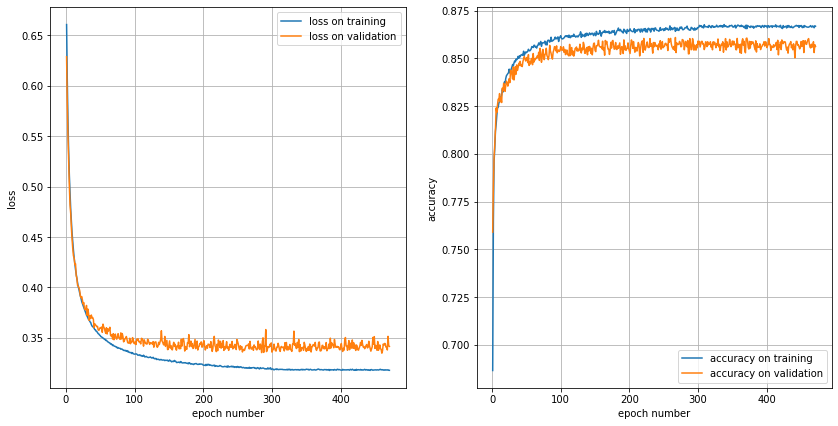

Early stopping on epoch = 472  with best accuracy on train = 0.8676997379571811 and best accuracy on dev = 0.8609375


In [0]:
train(model, train_dataloader_all_w2v, dev_dataloader_all_w2v,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [0]:
preds_dev_b = predict(model,dev_b_dataloader_all_w2v)
accuracy_score(y_dev_b,preds_dev_b)

0.752

In [0]:
N_EPOCHS = 3000
LEARNING_RATE = 1e-2

model = LogRegEmb(NUM_LABELS, emb_dim)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)
criterion = nn.BCEWithLogitsLoss()

sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.1)

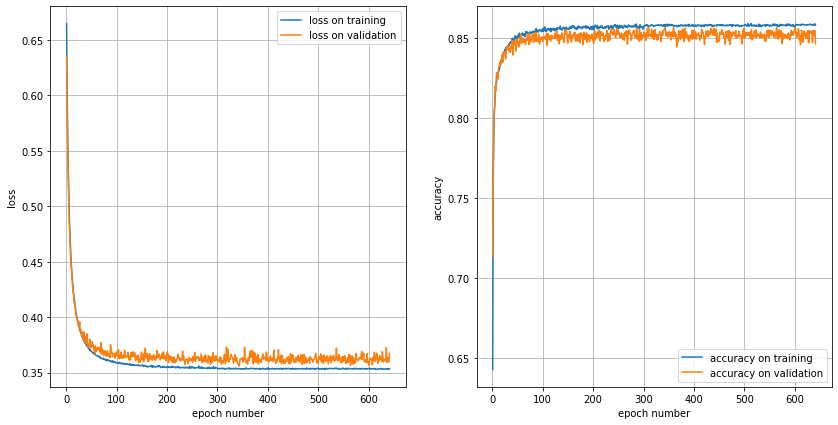

Early stopping on epoch = 642  with best accuracy on train = 0.8591241079393399 and best accuracy on dev = 0.856640625


In [0]:
train(model, train_dataloader_all_w2v, dev_dataloader_all_w2v,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [0]:
preds_dev_b = predict(model,dev_b_dataloader_all_w2v)
accuracy_score(y_dev_b,preds_dev_b)

0.7575

In [0]:
N_EPOCHS = 3000
LEARNING_RATE = 1e-3
hidden_layer_size = 32
NUM_LABELS = len(set(y_train))

model = FFNNBow(emb_dim, NUM_LABELS,hidden_layer_size)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()

sched1 = StepLR(optimizer, step_size=N_EPOCHS//15, gamma = 0.5)

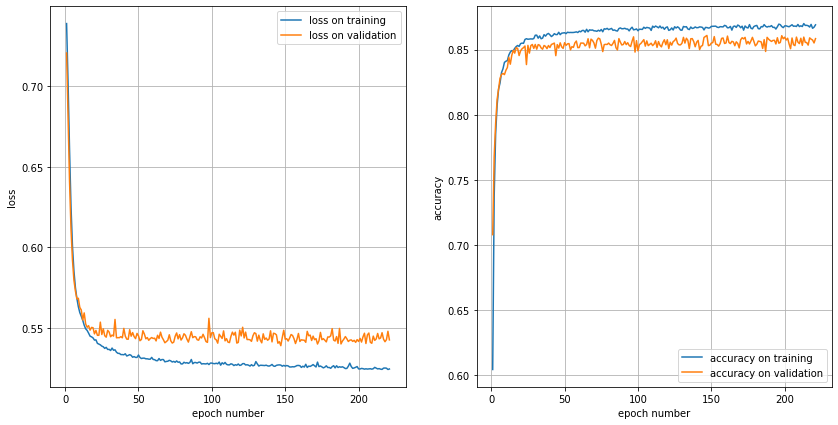

Early stopping on epoch = 227  with best accuracy on train = 0.8699612511150758 and best accuracy on dev = 0.86083984375


In [0]:
train(model, train_dataloader_all_w2v, dev_dataloader_all_w2v,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//15)

In [0]:
preds_dev_b = predict(model,dev_b_dataloader_all_w2v)
accuracy_score(y_dev_b,preds_dev_b)

0.7535

In [0]:
train_dataloader_w2v = DataLoader(train_dataset_w2v, batch_size=BATCH_SIZE, shuffle=False)
dev_dataloader_w2v = DataLoader(dev_dataset_w2v, batch_size=BATCH_SIZE, shuffle=False)
dev_b_dataloader_w2v = DataLoader(dev_b_dataset_w2v, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader_all_w2v = DataLoader(train_dataset_all_w2v, batch_size=BATCH_SIZE, shuffle=False)
dev_dataloader_all_w2v = DataLoader(dev_dataset_all_w2v, batch_size=BATCH_SIZE, shuffle=False)
dev_b_dataloader_all_w2v = DataLoader(dev_b_dataset_all_w2v, batch_size=BATCH_SIZE, shuffle=False)

NameError: ignored

In [0]:
dev_probs = predict(model,dev_dataloader_all_w2v)
train_probs = predict(model,train_dataloader_all_w2v)
test_probs = predict(model, test_dataloader_all_w2v,with_label=False)
dev_b_probs = predict(model,dev_b_dataloader_all_w2v)
test_b_probs = predict(model,test_b_dataloader_all_w2v,with_label=False)

In [0]:
ind_train = [ 'train/'+str(i) for i in range(0,len(train_probs))]
ind_dev = [ 'dev/'+str(i) for i in range(0,len(dev_probs))]
ind_test = [ 'test/'+str(i) for i in range(0,len(test_probs))]
ind_devb = [ 'dev-b/'+str(i) for i in range(0,len(dev_b_probs))]
ind_testb = [ 'test-b/'+str(i) for i in range(0,len(test_b_probs))]
inds = ind_train+ind_dev +ind_test +ind_devb +ind_testb

In [0]:
final = pd.Series(list(train_probs)+list(dev_probs)+list(test_probs)+list(dev_b_probs)+list(test_b_probs))

In [0]:
final.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
dtype: float64

In [0]:
final.replace({0.0: 'neg', 1.0: 'pos'},inplace=True)

In [0]:
final.index = inds

In [0]:
final.to_csv('preds_w2v_all_ffnn_lr_1e3.tsv',sep='\t',header=False)


### It was my best preds for competition

In [0]:
N_EPOCHS = 1000
LEARNING_RATE = 1e-3
hidden_layer_size = 64
NUM_LABELS = len(set(y_train))

model = FFNNBow(emb_dim, NUM_LABELS,hidden_layer_size)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()

sched1 = StepLR(optimizer, step_size=N_EPOCHS//10, gamma = 0.5)

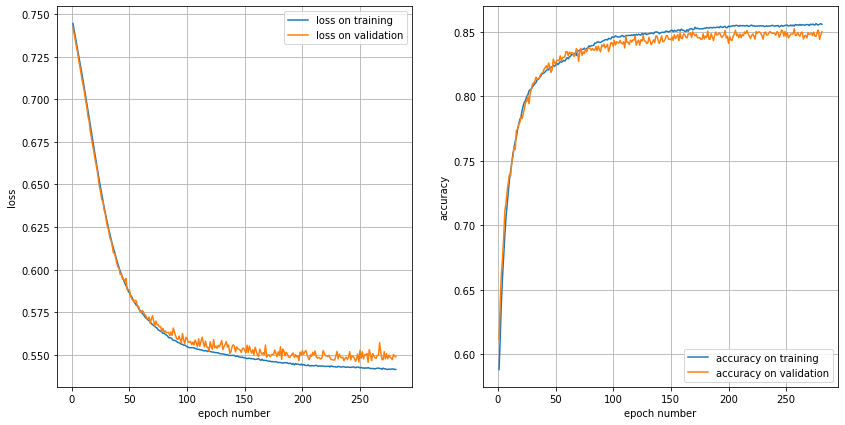

Early stopping on epoch = 281  with best accuracy on train = 0.8562214261819804 and best accuracy on dev = 0.85224609375


In [0]:
train(model, train_dataloader_all_w2v, dev_dataloader_all_w2v,sched1,criterion,optimizer, n_epoch=N_EPOCHS, early_stop= N_EPOCHS//10)

In [0]:
preds_dev_b = predict(model,dev_b_dataloader_all_w2v)
accuracy_score(y_dev_b,preds_dev_b)

0.7515

### 3.2 Impact of dimensionality

Train document embeddings from the Section 2.3 with different number of dimensions and plot dependence of classification accuracy from the number of dimensions.

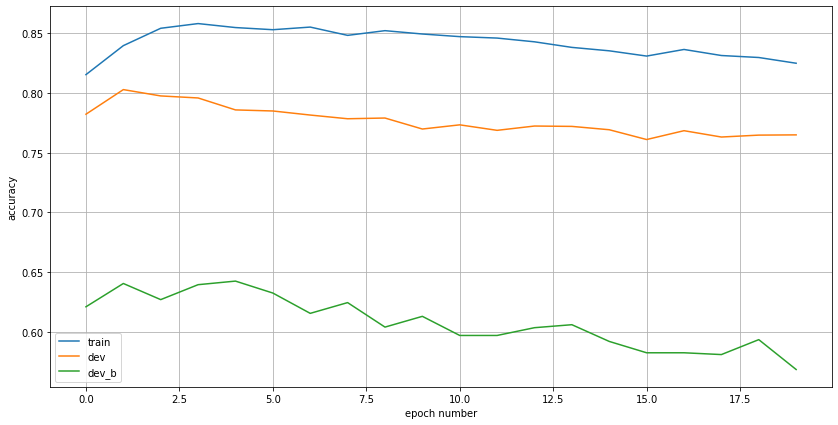

In [0]:
model_dbow_50 = Doc2Vec(vector_size=50, negative=5,  min_count=2, workers=2)
model_dbow_50.build_vocab(documents_train)
accuracy_doc_50 = train_d2v(model_dbow_50, documents_train, documents_dev, documents_dev_b, alpha_chng=0.0005,n_epoch=20)


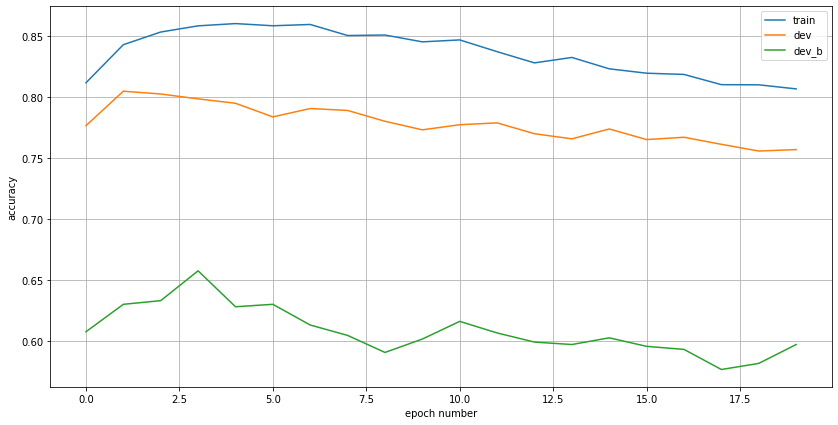

In [0]:
model_dbow_100 = Doc2Vec(vector_size=100, negative=5,  min_count=2, workers=2)
model_dbow_100.build_vocab(documents_train)
accuracy_doc_100 = train_d2v(model_dbow_100, documents_train, documents_dev, documents_dev_b, alpha_chng=0.0005,n_epoch=20)


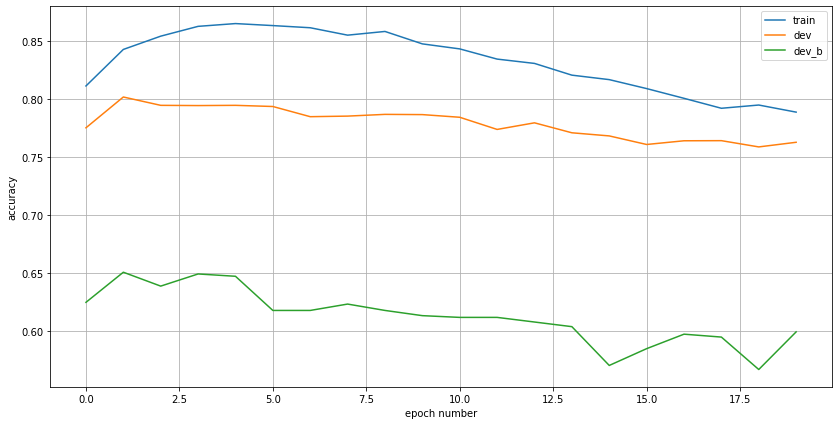

In [0]:
model_dbow_200 = Doc2Vec(vector_size=200, negative=5,  min_count=2, workers=2)
model_dbow_200.build_vocab(documents_train)
accuracy_doc_200 = train_d2v(model_dbow_200, documents_train, documents_dev, documents_dev_b, alpha_chng=0.0005,n_epoch=20)


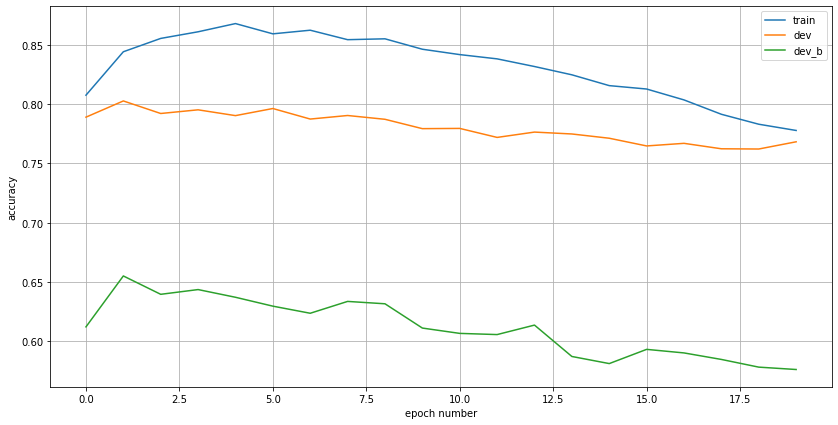

In [0]:
model_dbow_300 = Doc2Vec(vector_size=300, negative=5,  min_count=2, workers=2)
model_dbow_300.build_vocab(documents_train)
accuracy_doc_300 = train_d2v(model_dbow_300, documents_train, documents_dev, documents_dev_b, alpha_chng=0.0005,n_epoch=20)


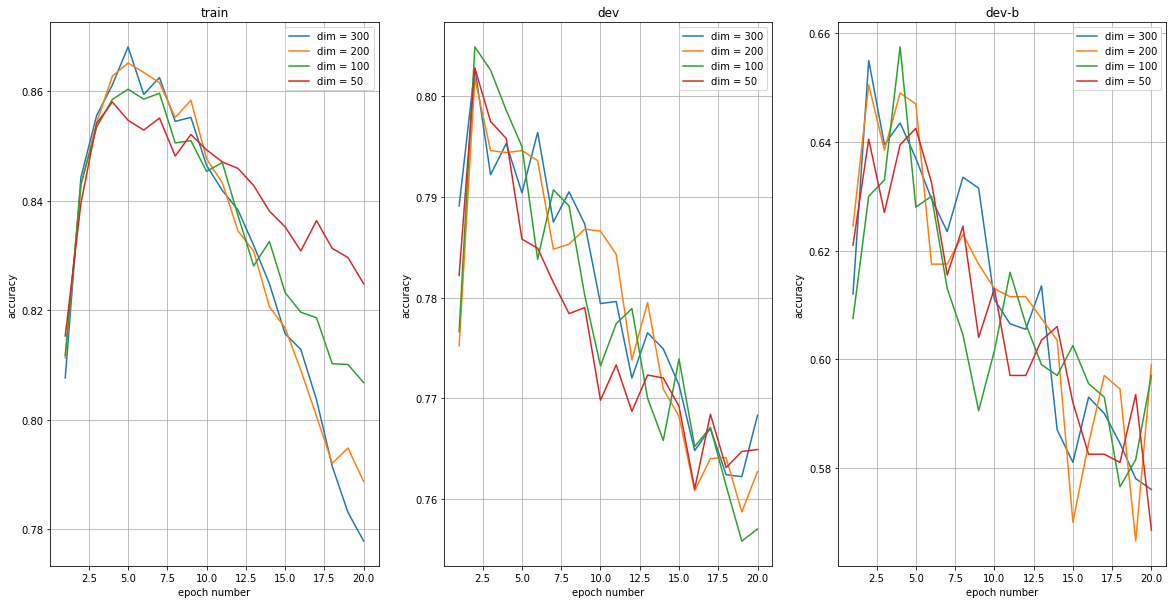

In [0]:
plt.figure(figsize=(20, 10))

plt.subplot(131)
plt.plot(np.arange(len(accuracy_doc_300[:,0])) + 1, accuracy_doc_300[:,0], label='dim = 300')
plt.plot(np.arange(len(accuracy_doc_200[:,0])) + 1, accuracy_doc_200[:,0], label='dim = 200')
plt.plot(np.arange(len(accuracy_doc_100[:,0])) + 1, accuracy_doc_100[:,0], label='dim = 100')
plt.plot(np.arange(len(accuracy_doc_50[:,0])) + 1, accuracy_doc_50[:,0], label='dim = 50')
plt.title('train')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(132)
plt.plot(np.arange(len(accuracy_doc_300[:,0])) + 1, accuracy_doc_300[:,1], label='dim = 300')
plt.plot(np.arange(len(accuracy_doc_200[:,0])) + 1, accuracy_doc_200[:,1], label='dim = 200')
plt.plot(np.arange(len(accuracy_doc_100[:,0])) + 1, accuracy_doc_100[:,1], label='dim = 100')
plt.plot(np.arange(len(accuracy_doc_50[:,0])) + 1, accuracy_doc_50[:,1], label='dim = 50')
plt.title('dev')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(133)
plt.plot(np.arange(len(accuracy_doc_300[:,0])) + 1, accuracy_doc_300[:,2], label='dim = 300')
plt.plot(np.arange(len(accuracy_doc_200[:,0])) + 1, accuracy_doc_200[:,2], label='dim = 200')
plt.plot(np.arange(len(accuracy_doc_100[:,0])) + 1, accuracy_doc_100[:,2], label='dim = 100')
plt.plot(np.arange(len(accuracy_doc_50[:,0])) + 1, accuracy_doc_50[:,2], label='dim = 50')
plt.title('dev-b')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

As we can see the result on dev and dev-b doesn't depend on dimension of vectors. 

We can see that the best accuracy for 100 dimension on dev and dev-b on 5 epochs. 

But more stable result we have for dim=50 on train